In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['.ipynb_checkpoints', 'catboost_info', 'EGFR_subtypes_prediction_383cases_01_newKNN14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newKNN141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR13.ipynb', 'EGFR_subtypes_prediction_383cases_01_newLR131.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB15.ipynb', 'EGFR_subtypes_prediction_383cases_01_newNB151.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF12.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF121.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-14.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF2-141.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF23.ipynb', 'EGFR_subtypes_prediction_383cases_01_newRF231.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSTACK191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM19.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM191.ipynb', 'EGFR_subtypes_prediction_383cases_01_newSVM192.ipynb', 'Embeded-FS-

In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'RF12'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/Embeded_FS/EmbededFS_results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/train-zscore.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/test-Zscore.csv")
# test1 = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testrj1921new_zscore.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
# test1=test1[data.keys()]
# test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-RF12.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-RF12.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/new2023/testrjZscore-SVM20.csv",index=None)



In [4]:
test.shape

(60, 13)

In [5]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/trainZscore-RF12.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_wavelet-LLH_firstorder_90Percentile                322 non-null    float64
 1   CT_wavelet-LLH_firstorder_Kurtosis                    322 non-null    float64
 2   CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized  322 non-null    float64
 3   CT_wavelet-LHH_firstorder_Kurtosis                    322 non-null    float64
 4   CT_original_glrlm_LongRunLowGrayLevelEmphasis         322 non-null    float64
 5   CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis      322 non-null    float64
 6   PET_original_firstorder_10Percentile                  322 non-null    float64
 7   CT_wavelet2-HHL_glcm_ClusterShade                     322 non-null    float64
 8   CT_original_shape_LeastAxisLength                     322 no

count   mean   std  \
CT_wavelet-LLH_firstorder_90Percentile             322.000  0.000 1.002   
CT_wavelet-LLH_firstorder_Kurtosis                 322.000  0.000 1.002   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... 322.000  0.000 1.002   
CT_wavelet-LHH_firstorder_Kurtosis                 322.000  0.000 1.002   
CT_original_glrlm_LongRunLowGrayLevelEmphasis      322.000  0.000 1.002   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   322.000  0.000 1.002   
PET_original_firstorder_10Percentile               322.000  0.000 1.002   
CT_wavelet2-HHL_glcm_ClusterShade                  322.000 -0.000 1.002   
CT_original_shape_LeastAxisLength                  322.000  0.000 1.002   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                322.000  0.000 1.002   
CT_wavelet-HHL_glcm_ClusterShade                   322.000  0.000 1.002   
PET_original_glrlm_GrayLevelNonUniformity          322.000 -0.000 1.002   
label                                              322.000  0.435 0.497   

                                                       min    10%    25%  \
CT_wavelet-LLH_firstorder_90Percentile              -1.296 -0.922 -0.602   
CT_wavelet-LLH_firstorder_Kurtosis                  -0.959 -0.628 -0.537   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma...  -1.598 -1.118 -0.834   
CT_wavelet-LHH_firstorder_Kurtosis                  -1.450 -0.874 -0.665   
CT_original_glrlm_LongRunLowGrayLevelEmphasis       -0.443 -0.392 -0.337   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis    -0.843 -0.789 -0.714   
PET_original_firstorder_10Percentile                -2.041 -1.053 -0.732   
CT_wavelet2-HHL_glcm_ClusterShade                   -4.360 -0.584 -0.085   
CT_original_shape_LeastAxisLength                   -0.747 -0.653 -0.639   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                 -2.585 -1.197 -0.662   
CT_wavelet-HHL_glcm_ClusterShade                   -12.031 -0.471 -0.127   
PET_original_glrlm_GrayLevelNonUniformity           -0.555 -0.505 -0.445   
label                                                0.000  0.000  0.000   

                                                      50%   75%   90%   95%  \
CT_wavelet-LLH_firstorder_90Percentile             -0.254 0.312 1.073 1.881   
CT_wavelet-LLH_firstorder_Kurtosis                 -0.317 0.092 0.832 1.945   
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... -0.360 0.587 1.538 1.899   
CT_wavelet-LHH_firstorder_Kurtosis                 -0.276 0.265 1.276 2.177   
CT_original_glrlm_LongRunLowGrayLevelEmphasis      -0.246 0.003 0.419 0.804   
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   -0.199 0.417 0.865 1.260   
PET_original_firstorder_10Percentile               -0.168 0.547 1.089 1.765   
CT_wavelet2-HHL_glcm_ClusterShade                   0.042 0.126 0.405 0.898   
CT_original_shape_LeastAxisLength                  -0.365 0.260 1.164 2.134   
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                -0.108 0.620 1.388 1.801   
CT_wavelet-HHL_glcm_ClusterShade                   -0.038 0.077 0.576 1.153   
PET_original_glrlm_GrayLevelNonUniformity          -0.299 0.032 0.537 1.659   
label                                               0.000 1.000 1.000 1.000   

                                                     99%   max  
CT_wavelet-LLH_firstorder_90Percentile             3.127 7.931  
CT_wavelet-LLH_firstorder_Kurtosis                 4.316 7.110  
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNorma... 2.519 2.867  
CT_wavelet-LHH_firstorder_Kurtosis                 4.012 5.213  
CT_original_glrlm_LongRunLowGrayLevelEmphasis      6.593 8.990  
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis   4.506 5.157  
PET_original_firstorder_10Percentile               3.028 5.535  
CT_wavelet2-HHL_glcm_ClusterShade                  3.183 9.394  
CT_original_shape_LeastAxisLength                  3.605 6.096  
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                2.459 3.673  
CT_wavelet-HHL_glcm_ClusterShade                   3.781 5.200  
PET_original_glrlm_GrayLevelNonUniformity         

In [8]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LLH_firstorder_90Percentile                  0
CT_wavelet-LLH_firstorder_Kurtosis                      0
CT_wavelet-HHH_glszm_SizeZoneNonUniformityNormalized    0
CT_wavelet-LHH_firstorder_Kurtosis                      0
CT_original_glrlm_LongRunLowGrayLevelEmphasis           0
CT_wavelet-HHL_glrlm_LongRunLowGrayLevelEmphasis        0
PET_original_firstorder_10Percentile                    0
CT_wavelet2-HHL_glcm_ClusterShade                       0
CT_original_shape_LeastAxisLength                       0
CT_lbp-3D-m1_glrlm_ShortRunEmphasis                     0
CT_wavelet-HHL_glcm_ClusterShade                        0
PET_original_glrlm_GrayLevelNonUniformity               0
label                                                   0
dtype: int64

In [22]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.650000
Naive Bayes: 0.567500
KNN: 0.587500
SVM: 0.665000
ANN: 0.667500
CART: 0.595000
BaggedTrees: 0.680000
RF: 0.695000
AdaBoost: 0.582500
GBM: 0.722500
XGBoost: 0.775000
LightGBM: 0.765000
CatBoost: 0.745000
NGBoost: 0.637500

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.626          0.650
1          Naive Bayes           0.594          0.567
2                  KNN           0.694          0.587
3                  SVM           0.693          0.665
4                  ANN           0.765          0.668
5                 CART           1.000          0.595
6          BaggedTrees           0.978          0.680
7                   RF           1.000          0.695
8             AdaBoost           0.873          0.583
9                  GBM           0.996          0.722
10

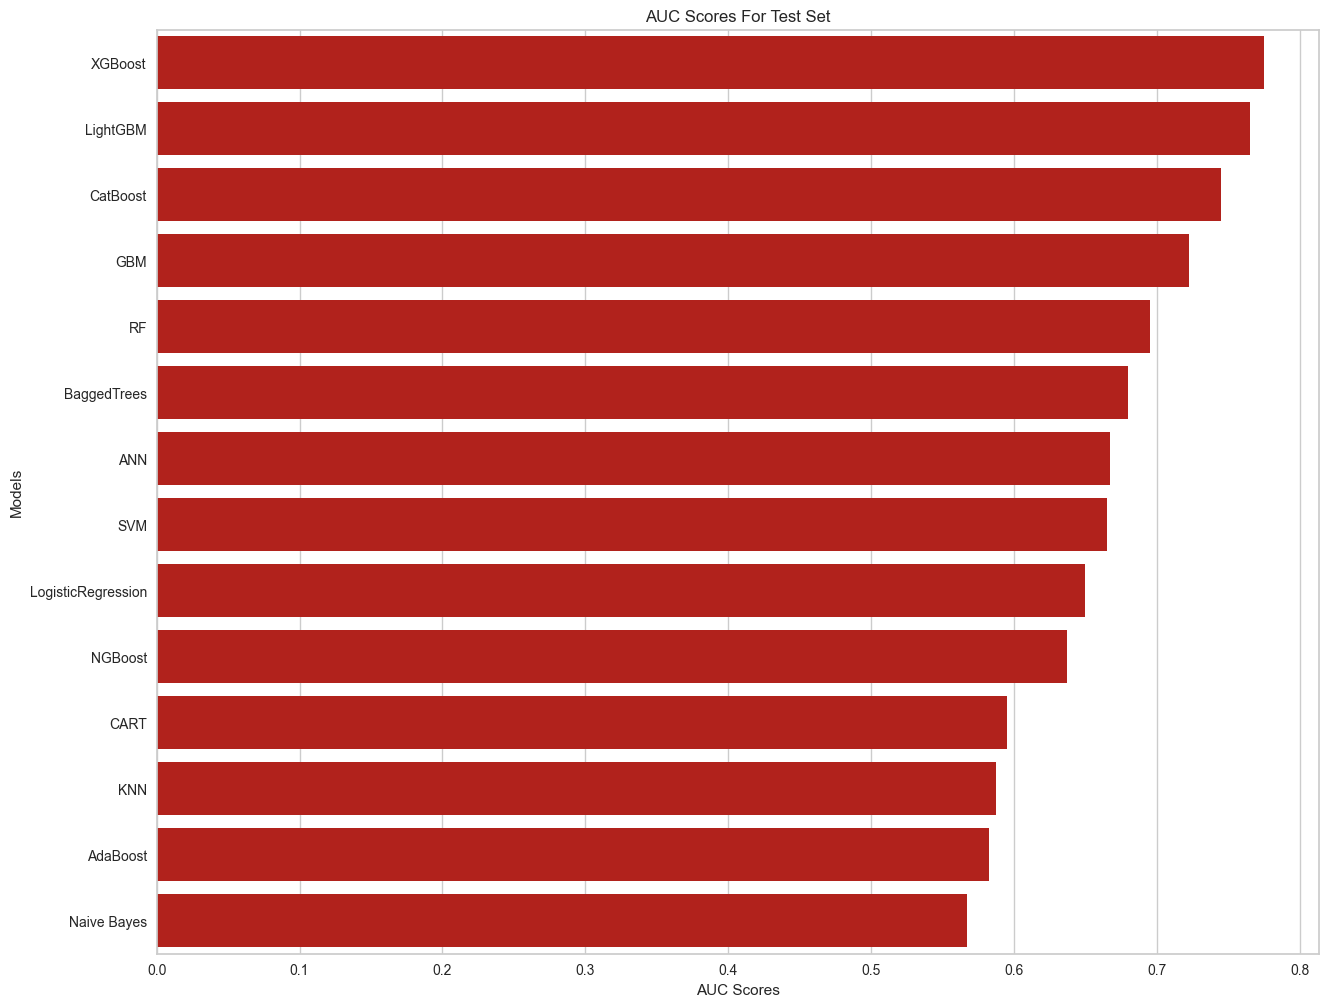

In [23]:
evaluate_classification_model_holdout(base_models)



In [24]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [26]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.535

In [27]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-LR73', Save_format = 'csv',Save_type = 'col')

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-LR73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.63      0.95      0.76        40
EGFR Mutated       0.60      0.12      0.20        25

    accuracy                           0.63        65
   macro avg       0.62      0.53      0.48        65
weighted avg       0.62      0.63      0.54        65

precision 0.6 accuracy 0.6307692307692307 recall 0.12 auc 0.535


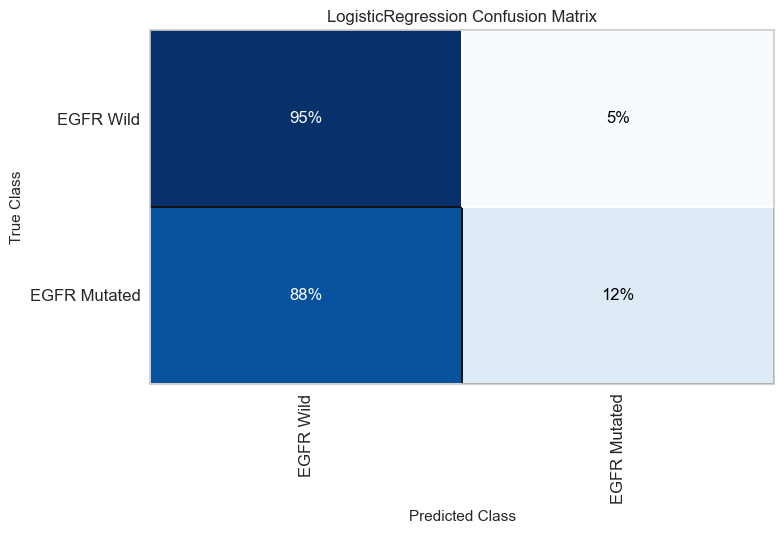

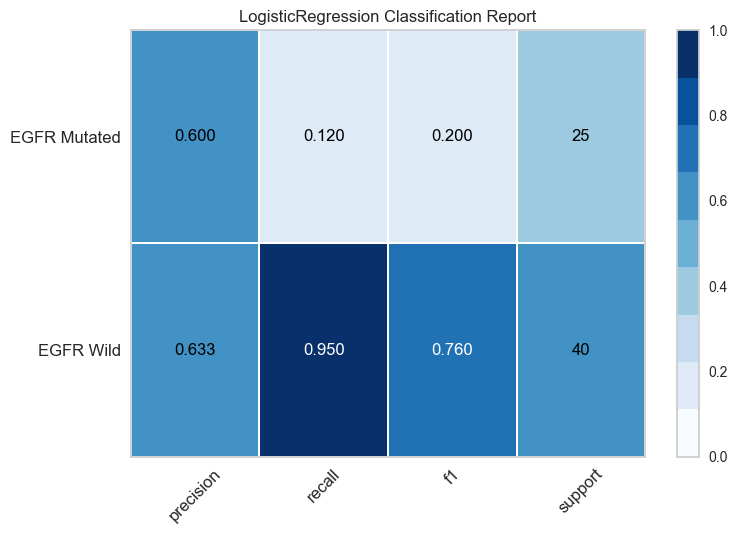

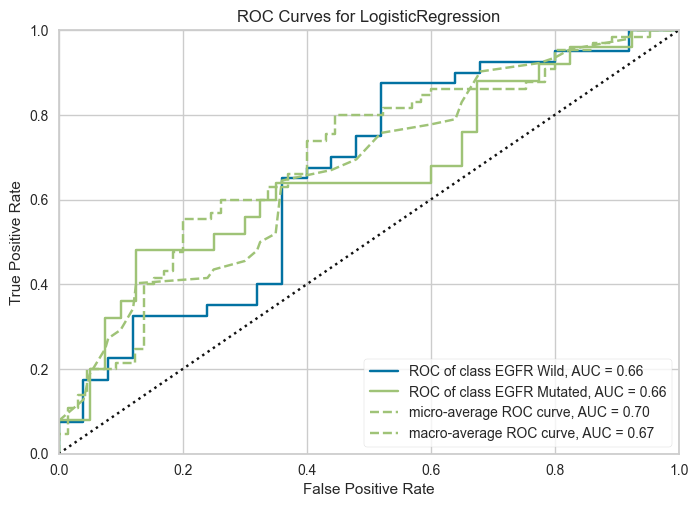

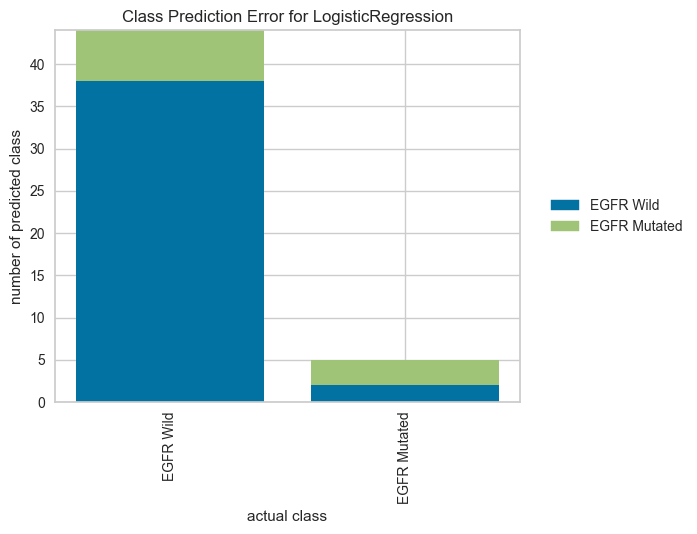

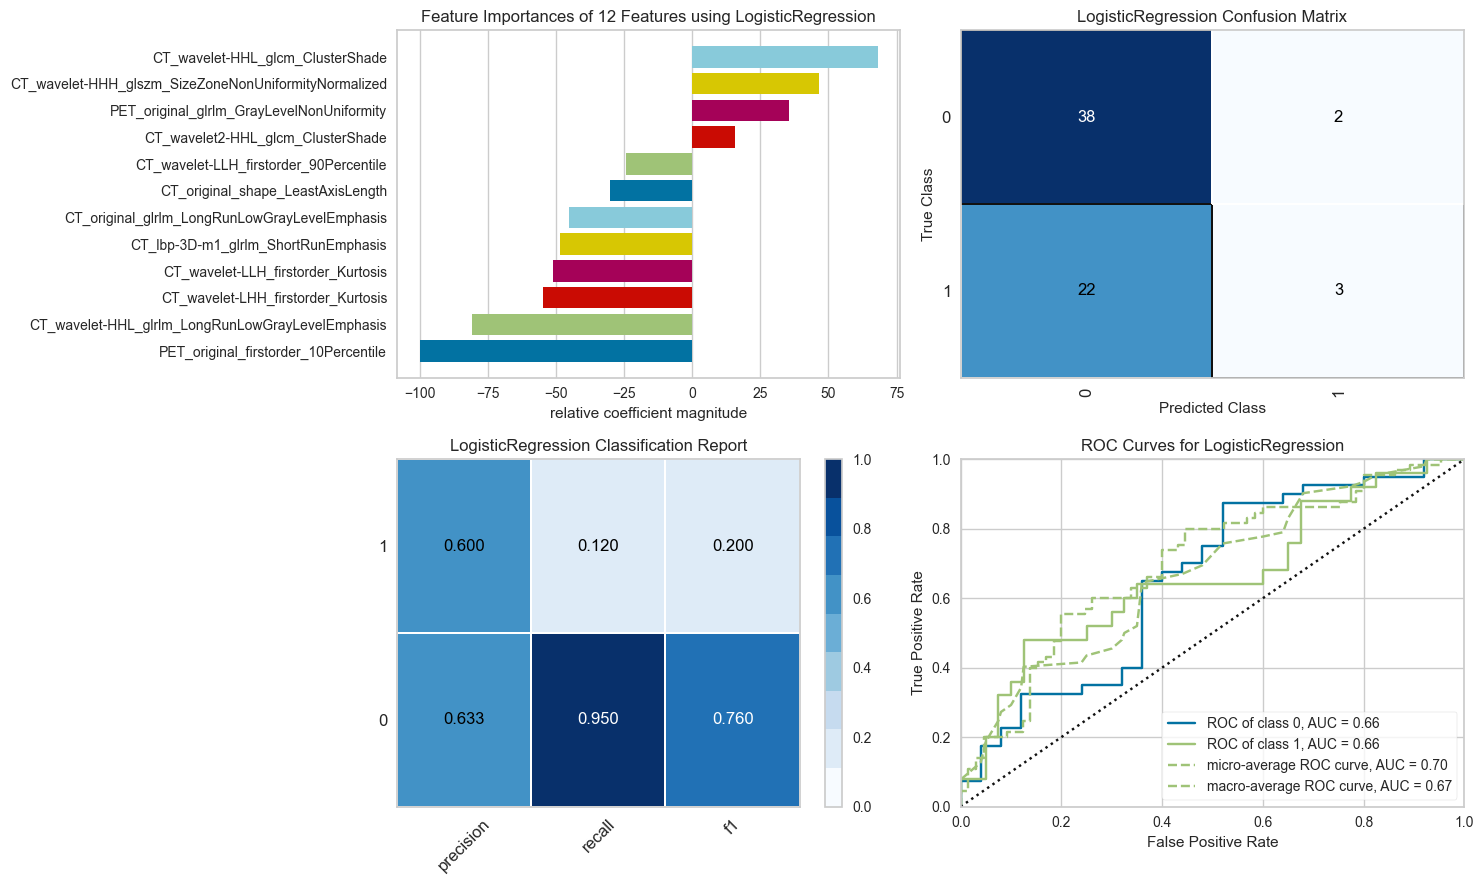

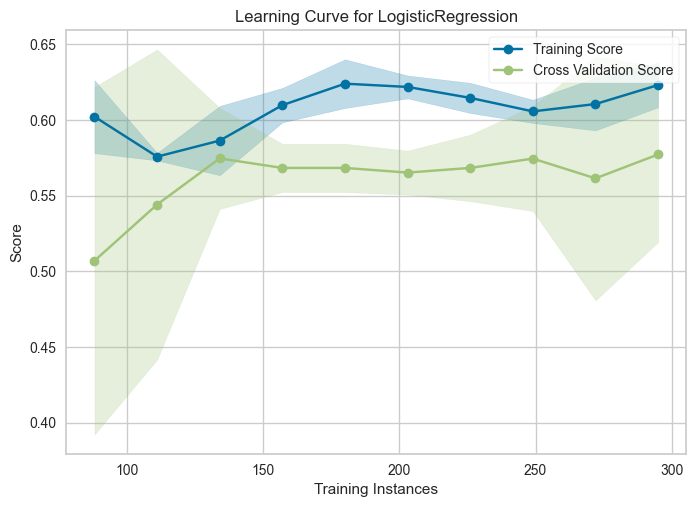

In [29]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [31]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.7300000000000001

In [32]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-RF73', Save_format = 'csv',Save_type = 'col')

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.77      0.90      0.83        40
EGFR Mutated       0.78      0.56      0.65        25

    accuracy                           0.77        65
   macro avg       0.77      0.73      0.74        65
weighted avg       0.77      0.77      0.76        65

precision 0.7777777777777778 accuracy 0.7692307692307693 recall 0.56 auc 0.7300000000000001


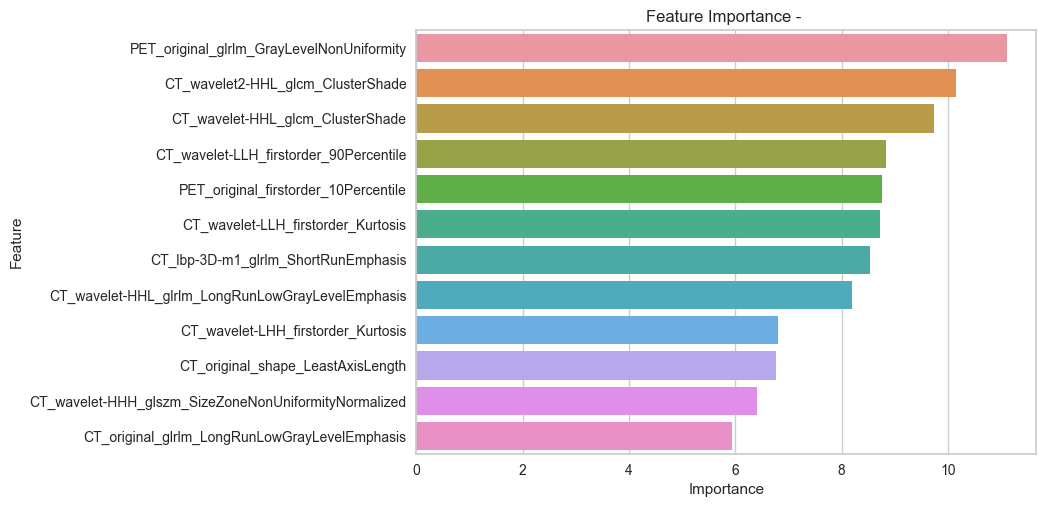

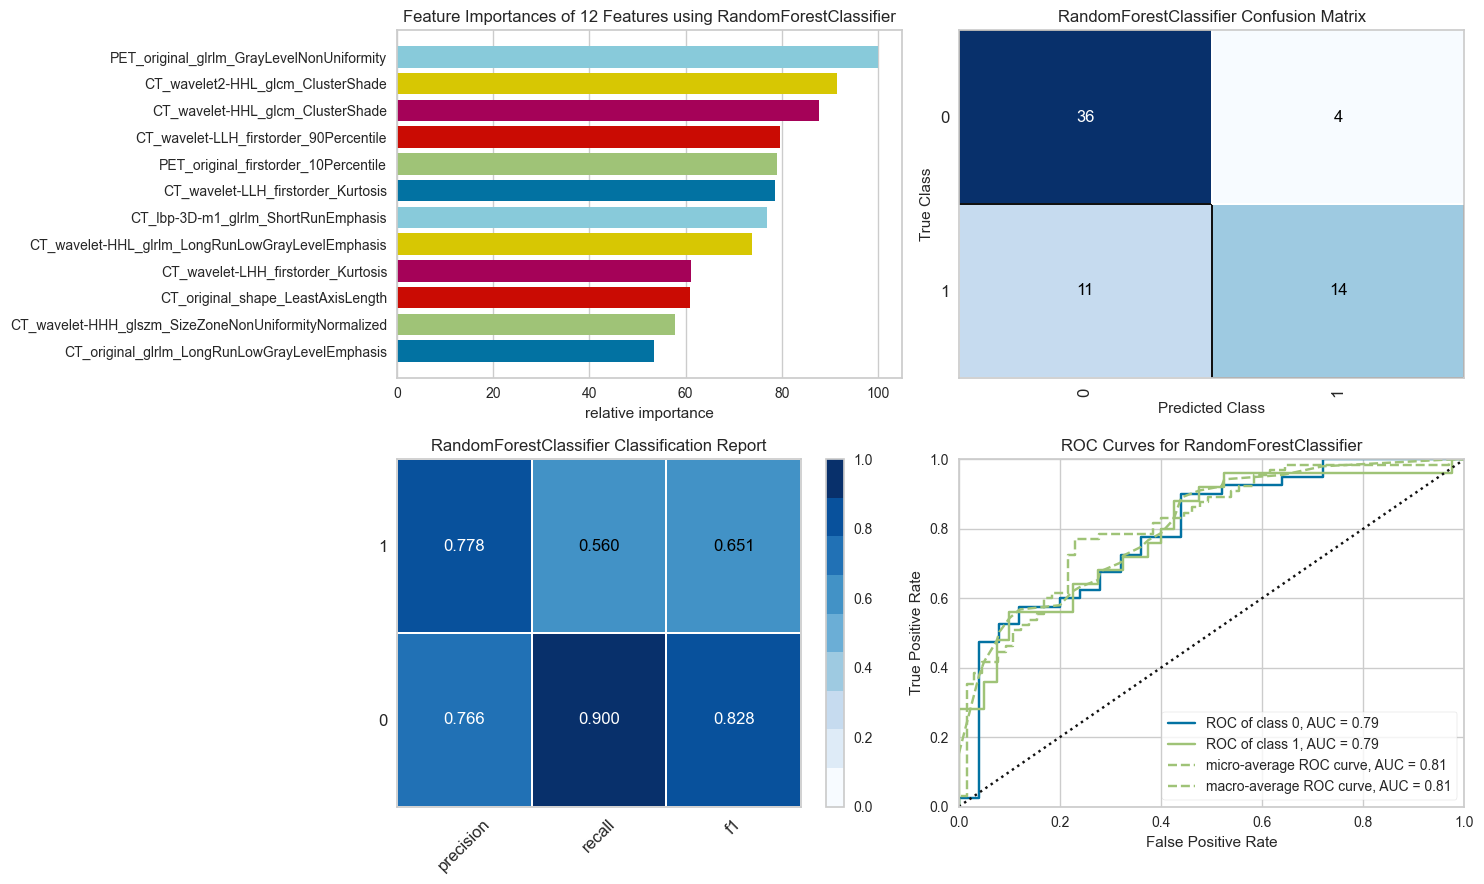

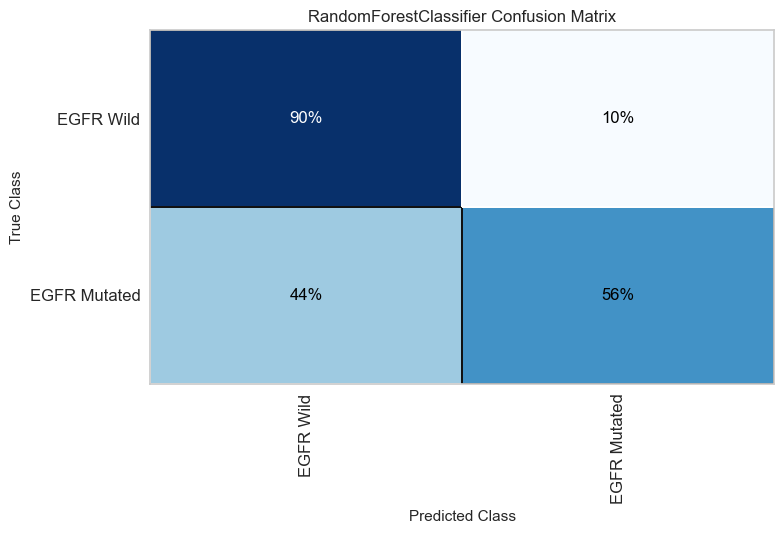

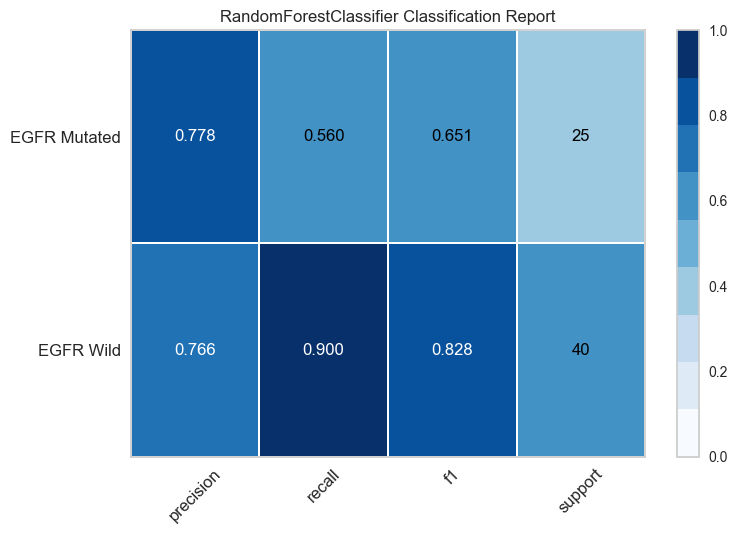

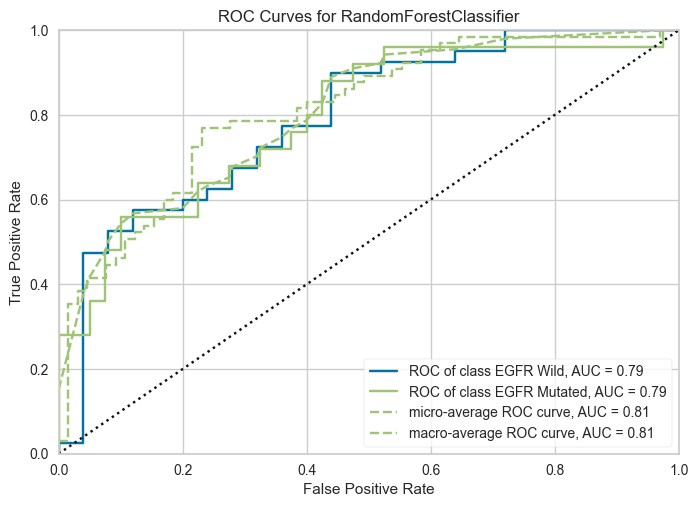

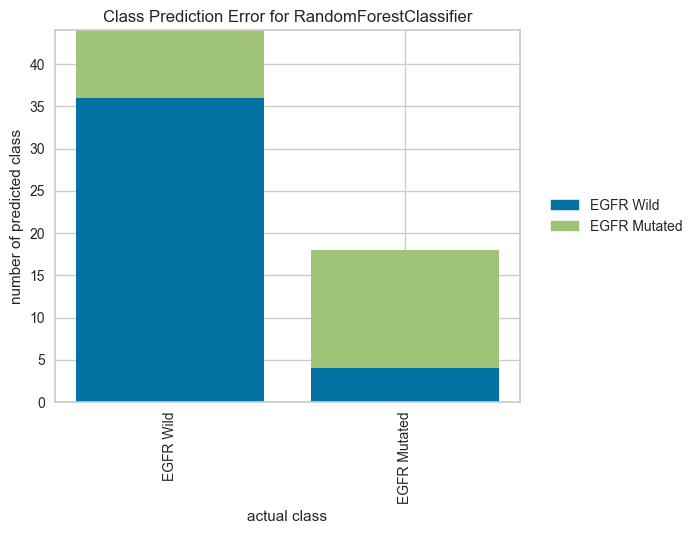

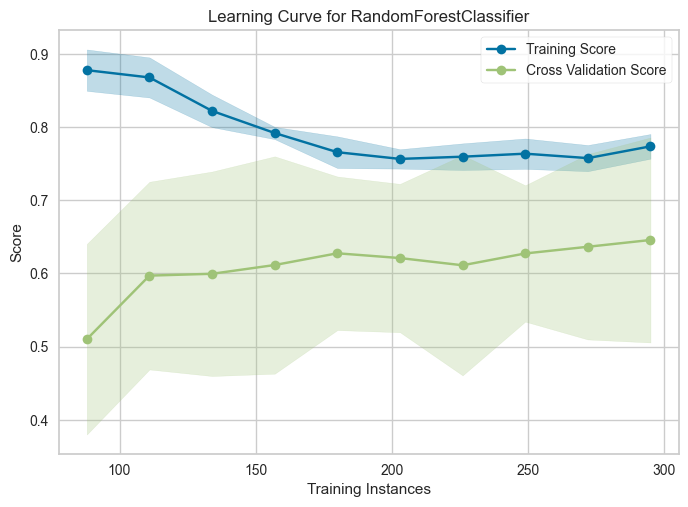

In [34]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [24]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6929897	total: 360us	remaining: 180ms
1:	learn: 0.6927105	total: 803us	remaining: 200ms
2:	learn: 0.6924479	total: 1.22ms	remaining: 202ms
3:	learn: 0.6922222	total: 1.61ms	remaining: 200ms
4:	learn: 0.6919801	total: 2ms	remaining: 198ms
5:	learn: 0.6915555	total: 2.37ms	remaining: 195ms
6:	learn: 0.6911878	total: 2.77ms	remaining: 195ms
7:	learn: 0.6909746	total: 3.17ms	remaining: 195ms
8:	learn: 0.6905117	total: 3.56ms	remaining: 194ms
9:	learn: 0.6902072	total: 3.98ms	remaining: 195ms
10:	learn: 0.6900387	total: 4.32ms	remaining: 192ms
11:	learn: 0.6898867	total: 4.61ms	remaining: 188ms
12:	learn: 0.6894775	total: 4.9ms	remaining: 183ms
13:	learn: 0.6892236	total: 5.18ms	remaining: 180ms
14:	learn: 0.6890258	total: 5.51ms	remaining: 178ms
15:	learn: 0.6887600	total: 5.84ms	remaining: 177ms
16:	learn: 0.6884651	total: 6.17ms	remaining: 175ms
17:	learn: 0.6881568	total: 6.47ms	remaining: 173ms
18:	learn: 0.6877178	total: 6.75ms	remaining: 171ms
19:	learn: 0.6875906	total: 

494:	learn: 0.6148510	total: 152ms	remaining: 1.53ms
495:	learn: 0.6147326	total: 152ms	remaining: 1.23ms
496:	learn: 0.6146017	total: 153ms	remaining: 921us
497:	learn: 0.6145365	total: 153ms	remaining: 614us
498:	learn: 0.6144144	total: 153ms	remaining: 307us
499:	learn: 0.6143183	total: 154ms	remaining: 0us


0.7538461538461538

In [25]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [26]:
# shap.dependence_plot(y_train, shap_values, X_train)

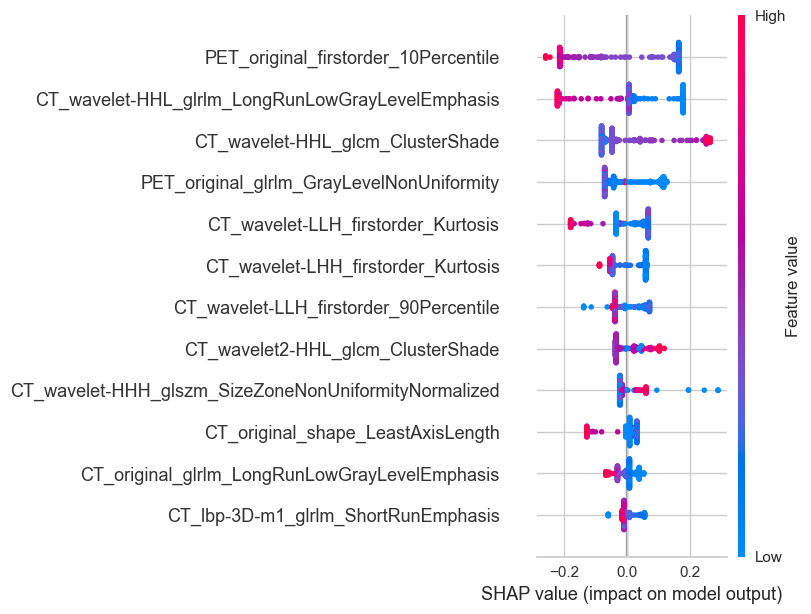

In [27]:

shap.summary_plot(shap_values, X_train)

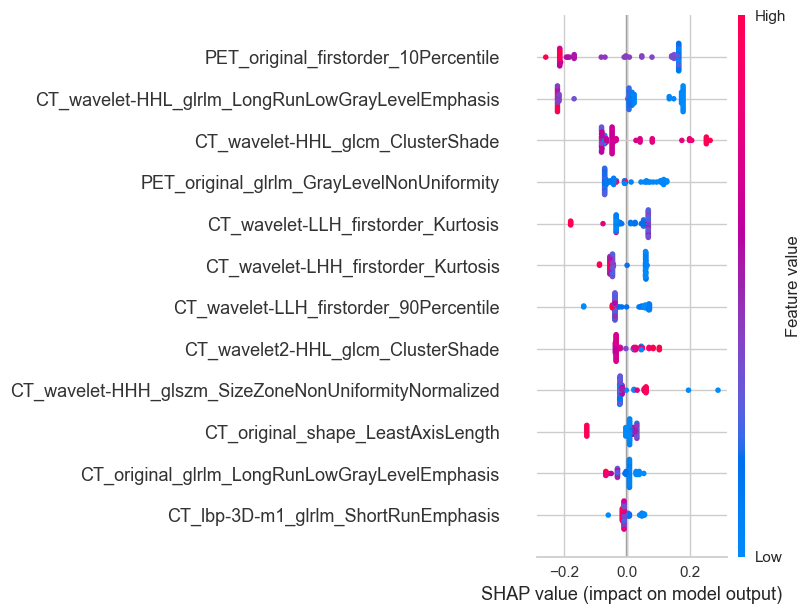

In [28]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [29]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [30]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-CBC73', Save_format = 'csv',Save_type = 'col')

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.74      0.93      0.82        40
EGFR Mutated       0.80      0.48      0.60        25

    accuracy                           0.75        65
   macro avg       0.77      0.70      0.71        65
weighted avg       0.76      0.75      0.74        65

precision 0.8 accuracy 0.7538461538461538 recall 0.48 auc 0.7025


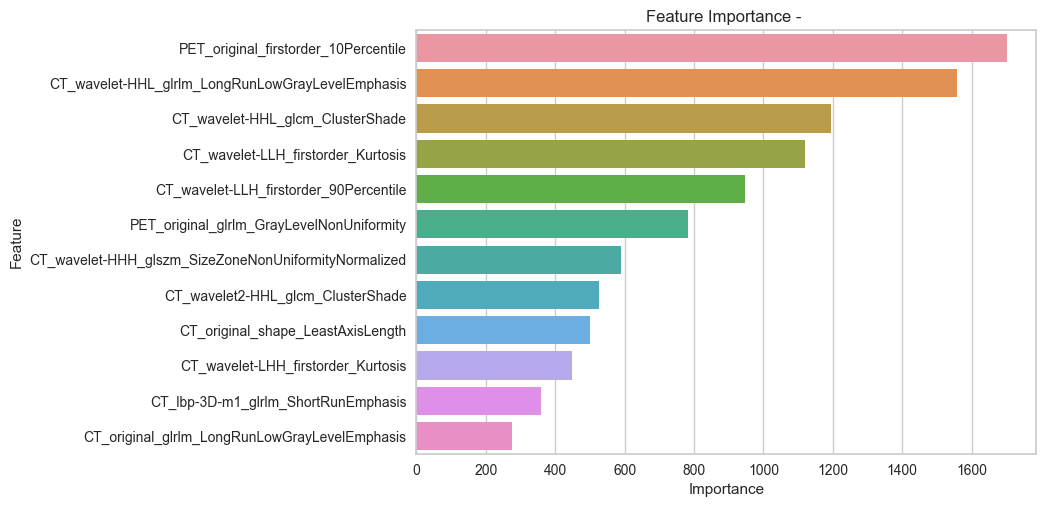

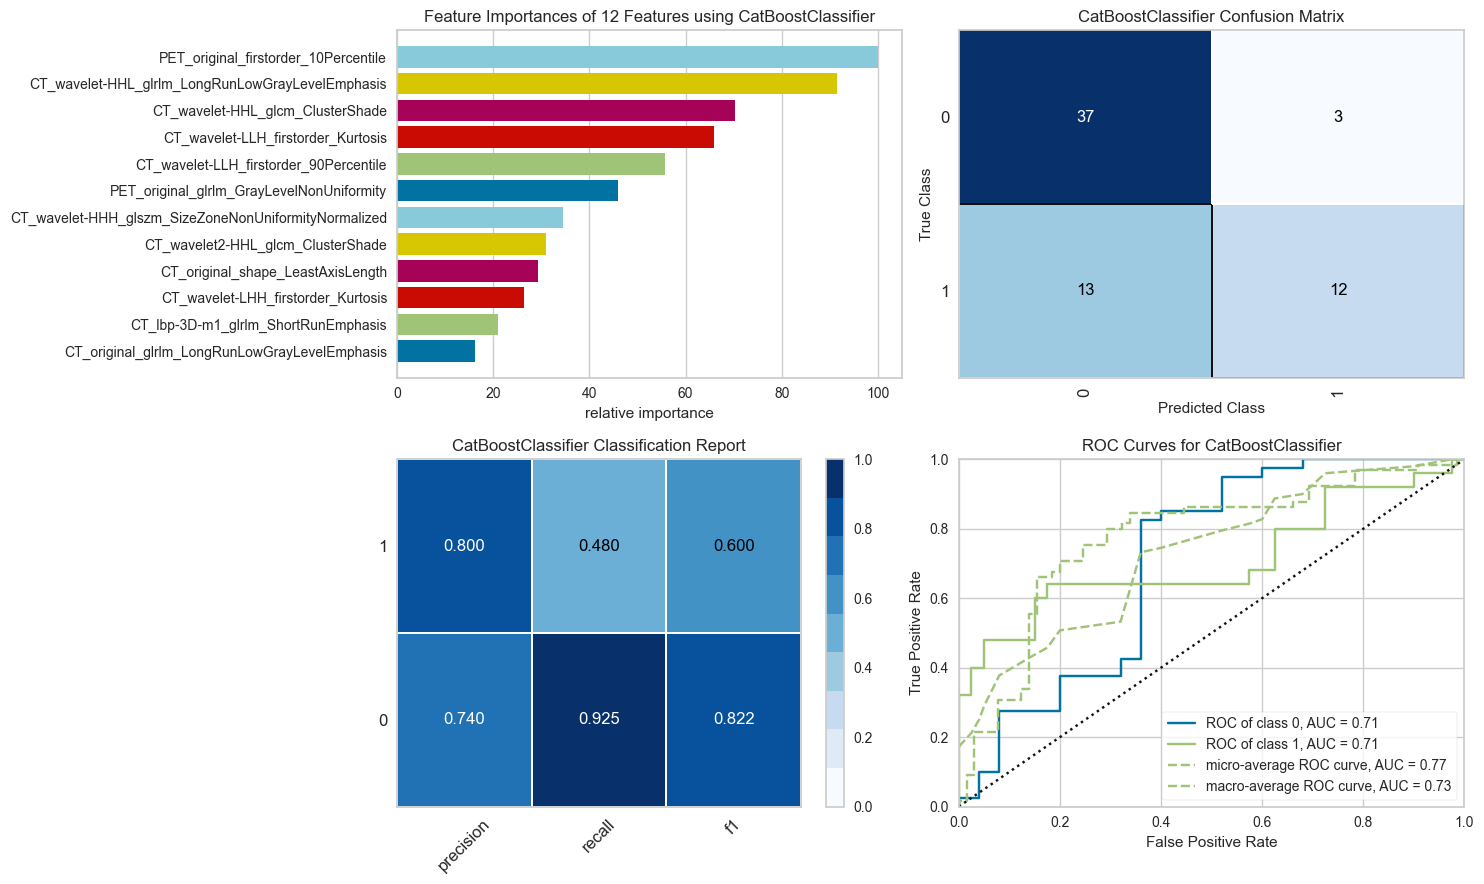

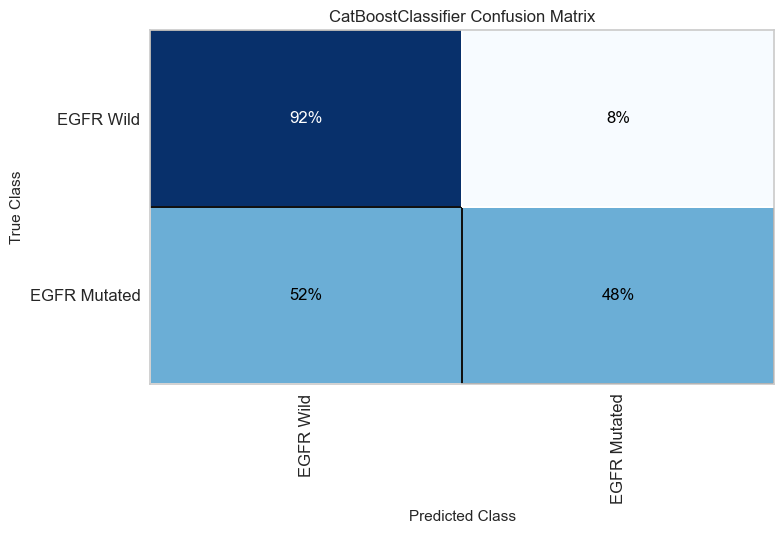

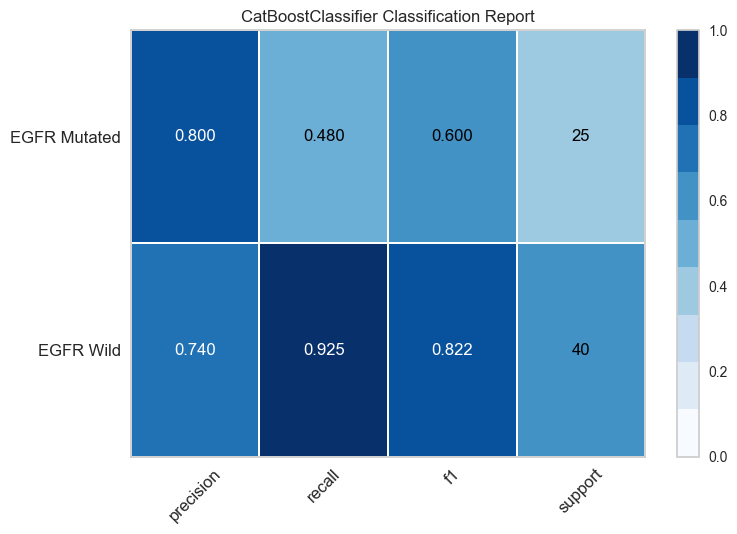

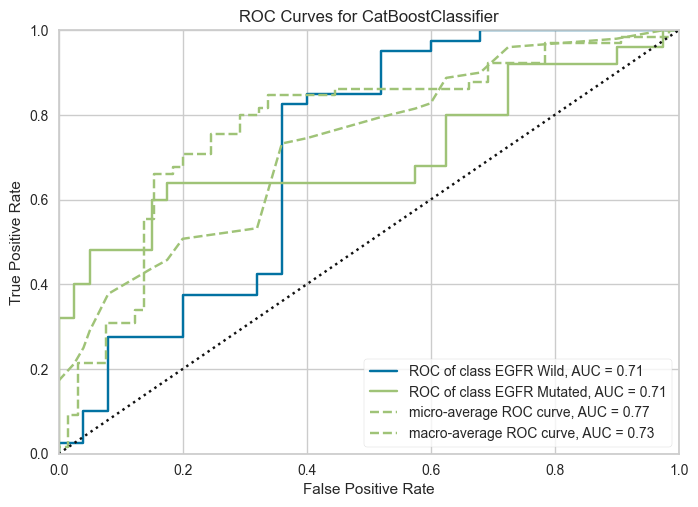

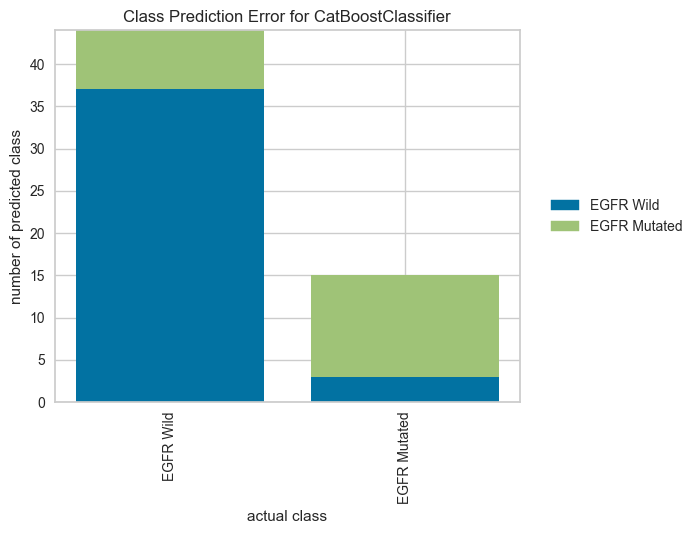

TypeError: __init__() got an unexpected keyword argument 'iterations'

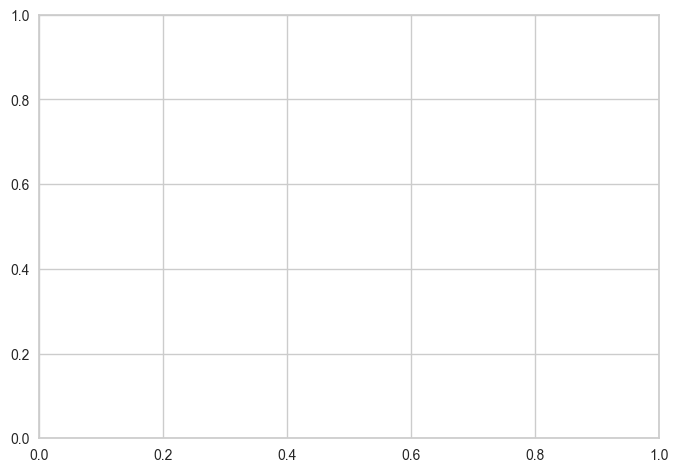

In [32]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [39]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7230769230769231

In [40]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-ADB73', Save_format = 'csv',Save_type = 'col')

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.74      0.85      0.79        40
    EGFR E21       0.68      0.52      0.59        25

    accuracy                           0.72        65
   macro avg       0.71      0.69      0.69        65
weighted avg       0.72      0.72      0.71        65

precision 0.6842105263157895 accuracy 0.7230769230769231 recall 0.52 auc 0.685


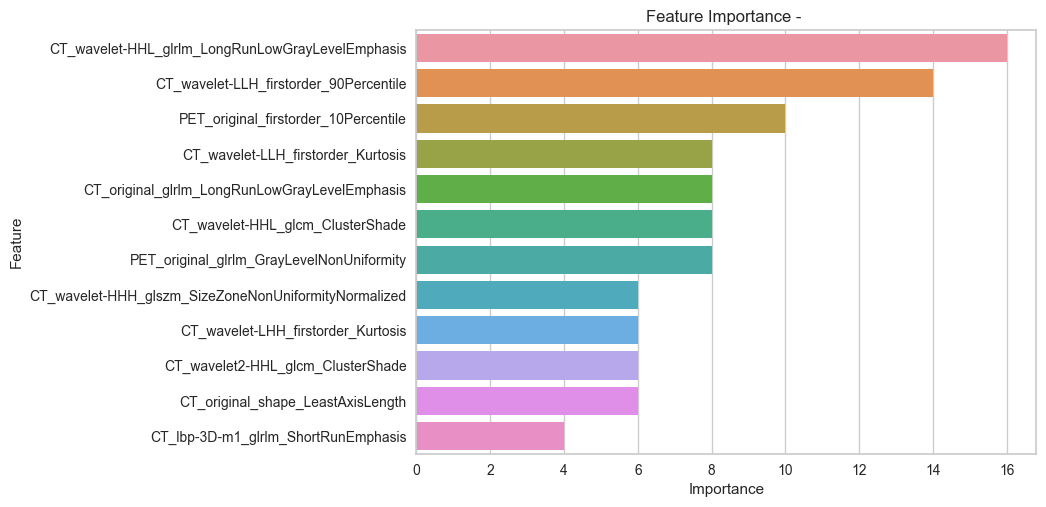

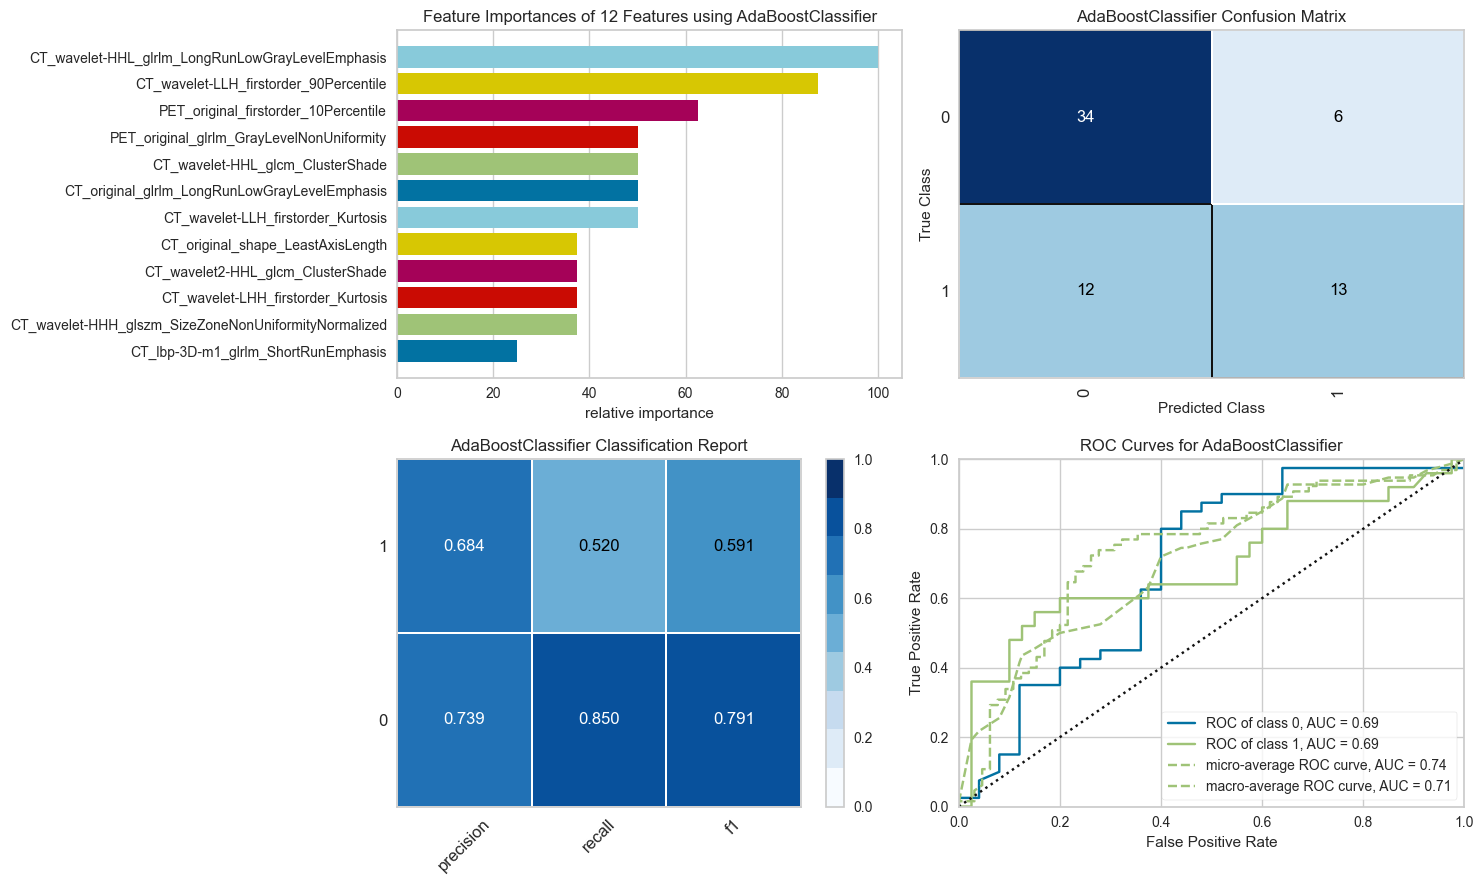

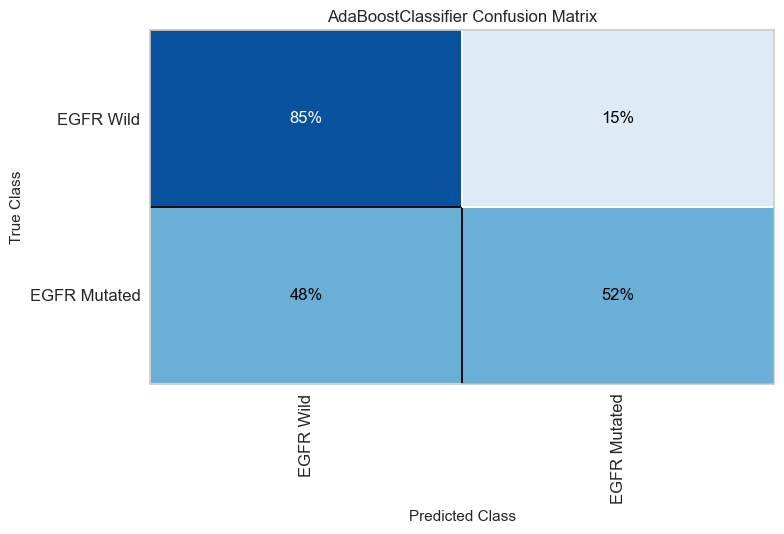

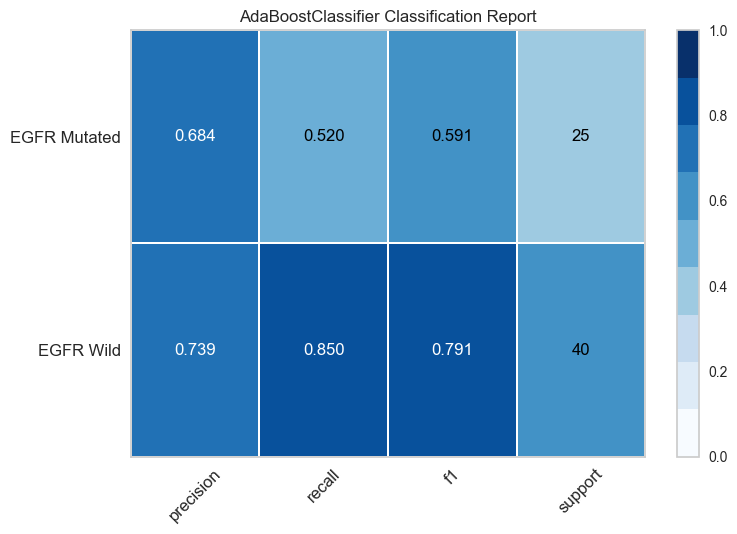

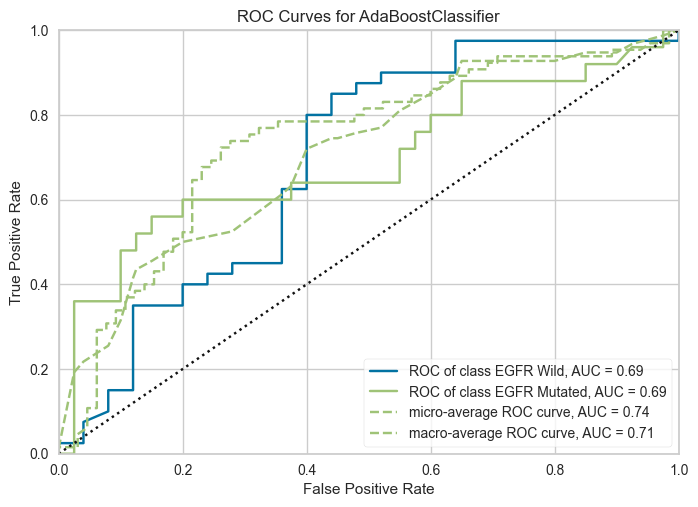

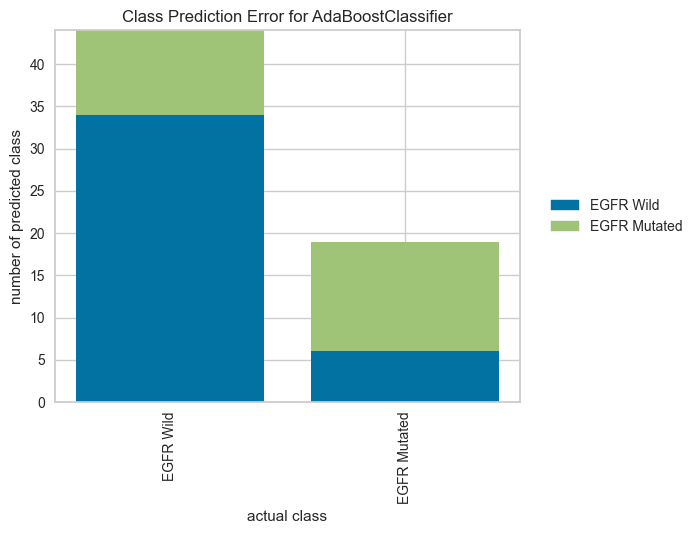

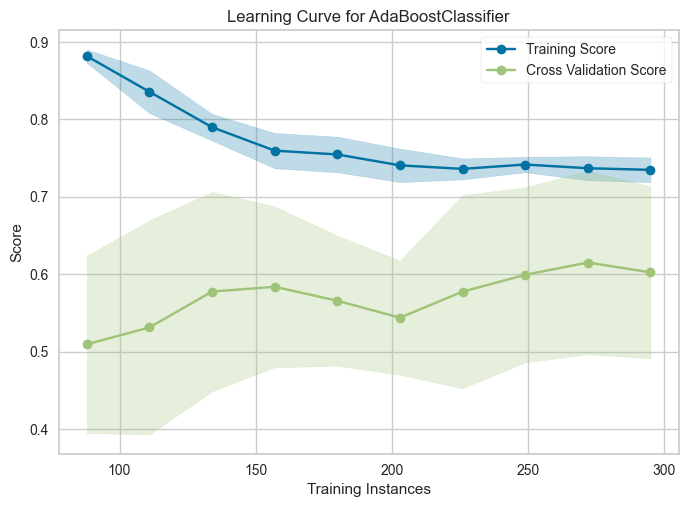

In [42]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [44]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.7538461538461538

In [45]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-gbdt', Save_format = 'csv',Save_type = 'col')

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.76      0.88      0.81        40
EGFR Mutated       0.74      0.56      0.64        25

    accuracy                           0.75        65
   macro avg       0.75      0.72      0.73        65
weighted avg       0.75      0.75      0.75        65

precision 0.7368421052631579 accuracy 0.7538461538461538 recall 0.56 auc 0.7175


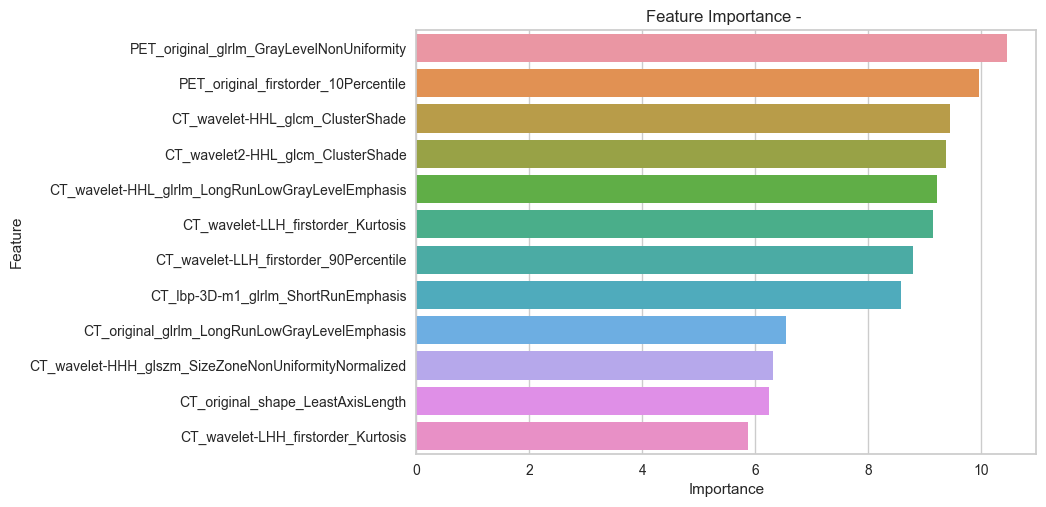

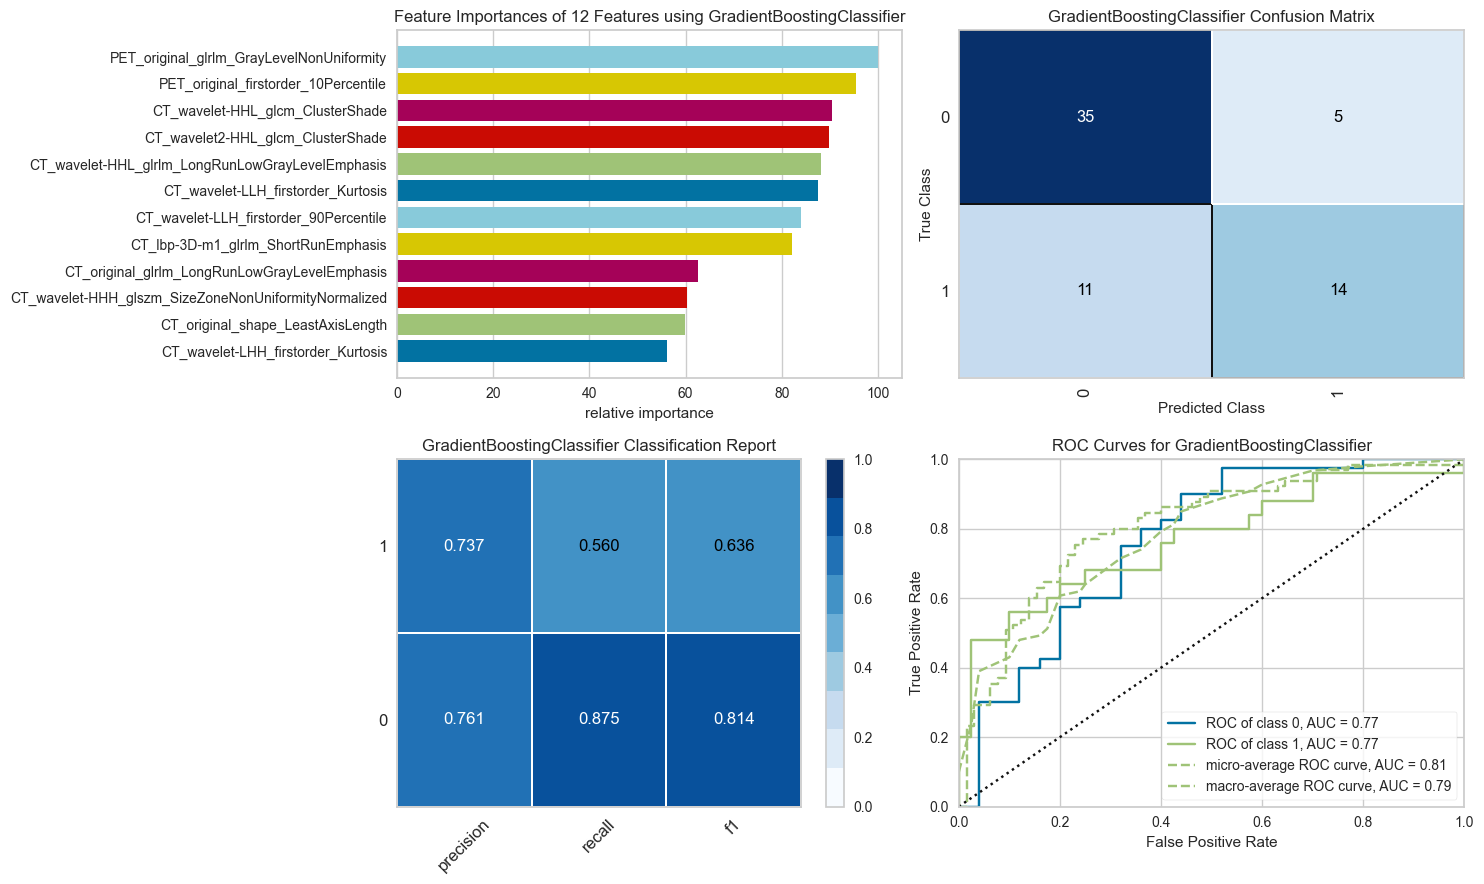

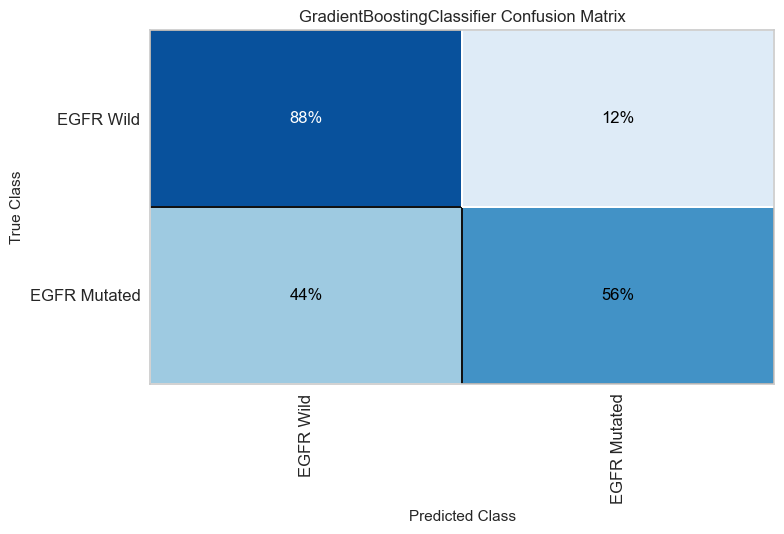

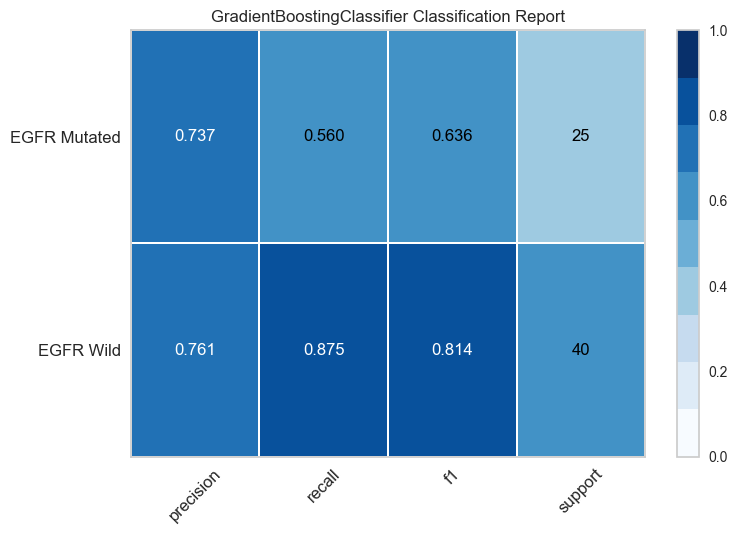

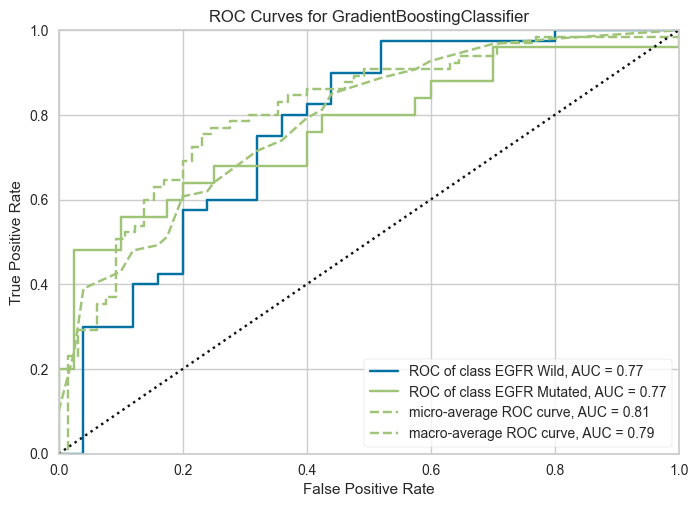

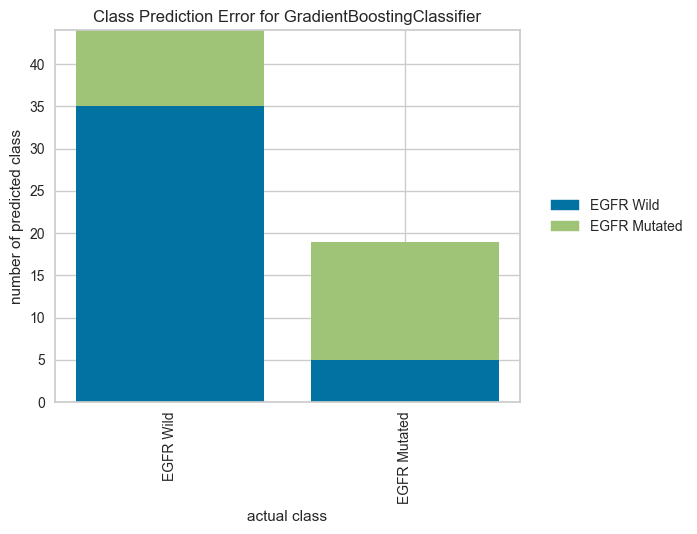

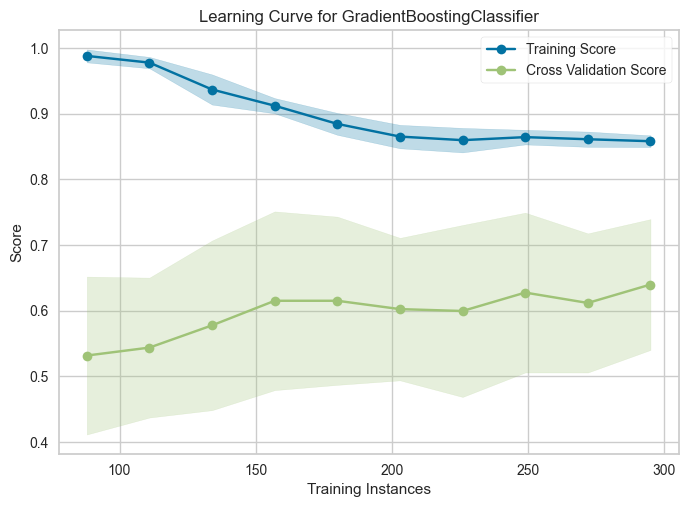

In [47]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [57]:
# dt_model = DecisionTreeClassifier()
# DecisionTreeClassifier.estimator.get_params().keys()

In [68]:
# Final Model
dt_tuned = DecisionTreeClassifier(**dt_cv_model.best_params_).fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6153846153846154

In [69]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-dt', Save_format = 'csv',Save_type = 'col')

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-dt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.62      1.00      0.76        40
EGFR Mutated       0.00      0.00      0.00        25

    accuracy                           0.62        65
   macro avg       0.31      0.50      0.38        65
weighted avg       0.38      0.62      0.47        65

precision 0.0 accuracy 0.6153846153846154 recall 0.0 auc 0.5


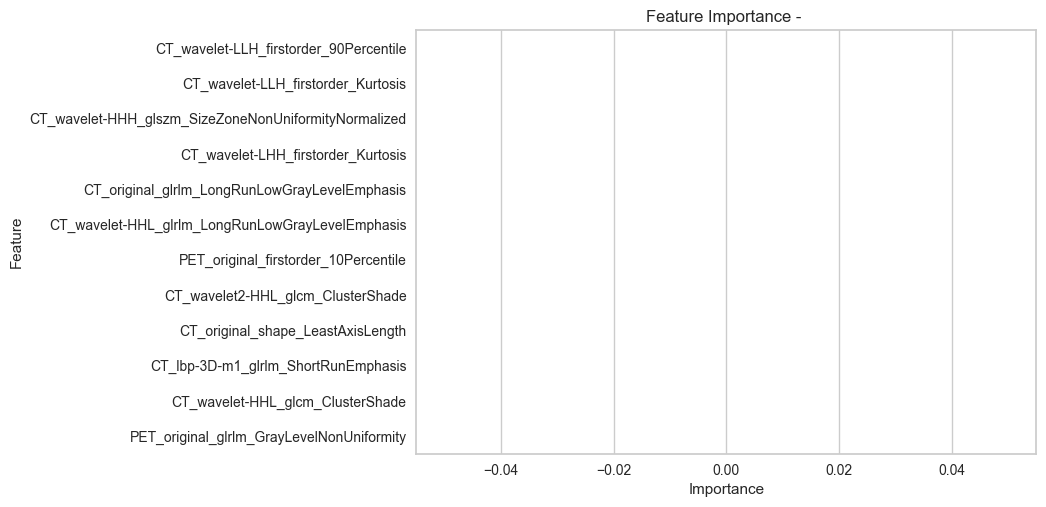

C:\Users\zuoya\.conda\envs\tf\lib\site-packages\yellowbrick\model_selection\importances.py:209: RuntimeWarning: invalid value encountered in true_divide
  self.feature_importances_ /= maxv


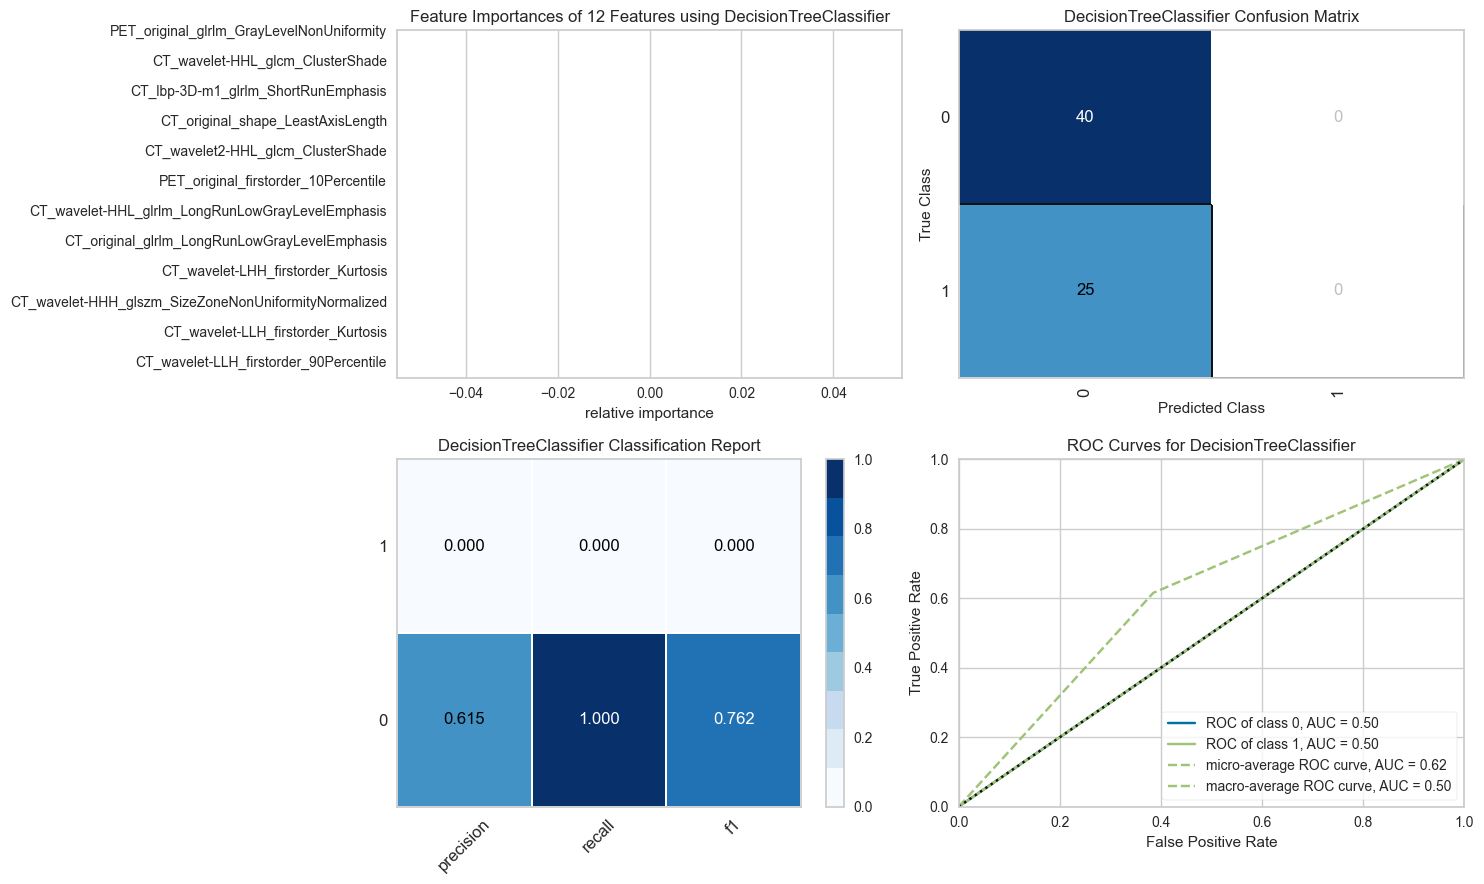

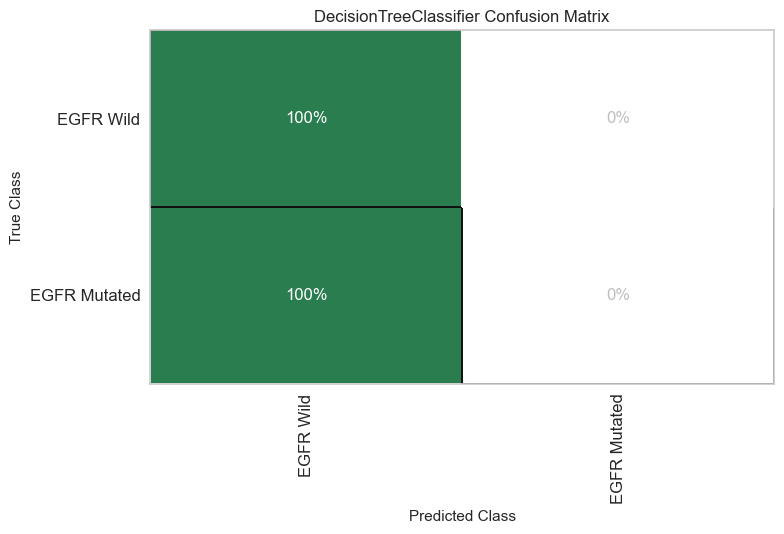

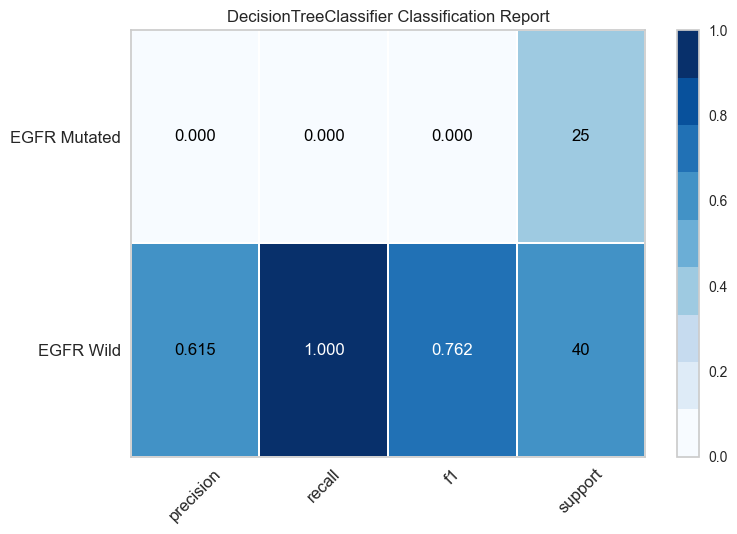

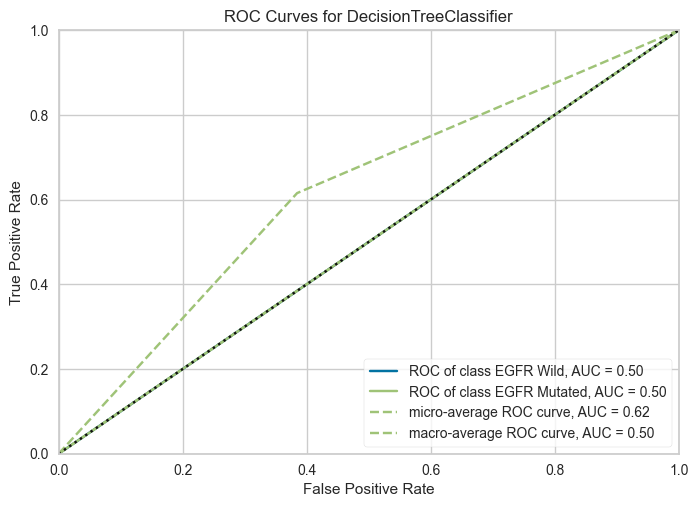

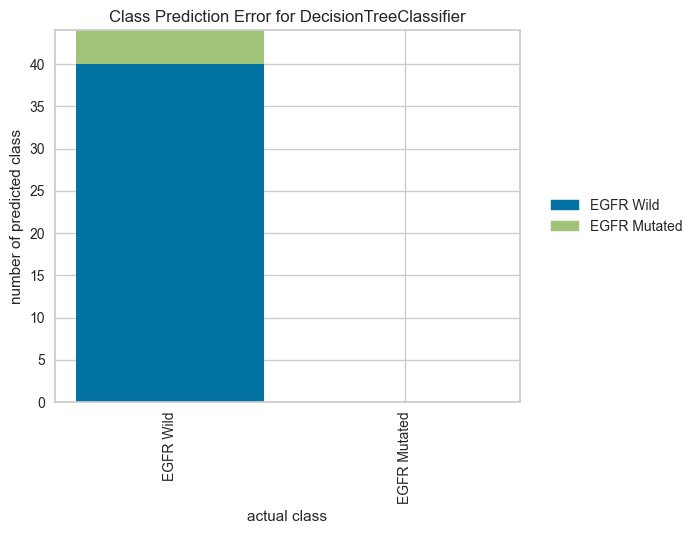

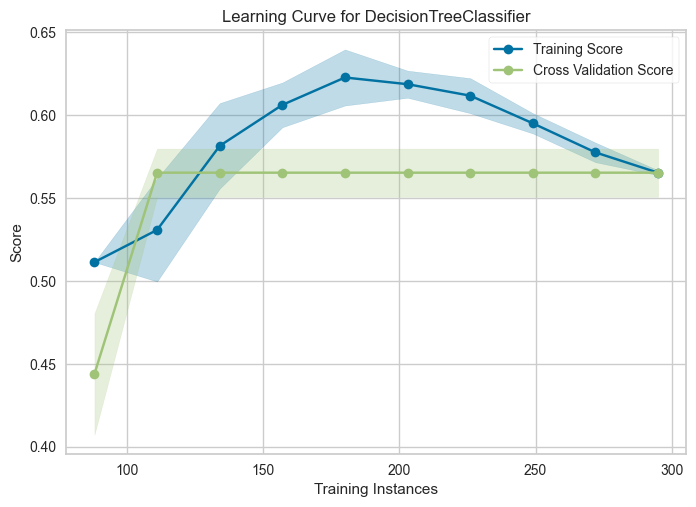

In [71]:
# # Visualization of Results --> Feature Importances
# # dt_tuned = wrap(dt_tuned)
plot_feature_importances(dt_tuned)

report_results_quickly(dt_tuned)
plot_results(dt_tuned)
plot_learning_curve(dt_tuned)

In [49]:
print(svm_model.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [50]:
# Final Model
svm_tuned = svm.SVC(**svm_model.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
ACC = accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score = roc_auc_score(y_test, y_pred)

print(ACC,roc_auc_score)

0.7230769230769231 0.67


In [51]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-SVM73', Save_format = 'csv',Save_type = 'col')

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-SVM73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.72      0.90      0.80        40
EGFR Mutated       0.73      0.44      0.55        25

    accuracy                           0.72        65
   macro avg       0.73      0.67      0.67        65
weighted avg       0.73      0.72      0.70        65

precision 0.7333333333333333 accuracy 0.7230769230769231 recall 0.44 auc 0.67


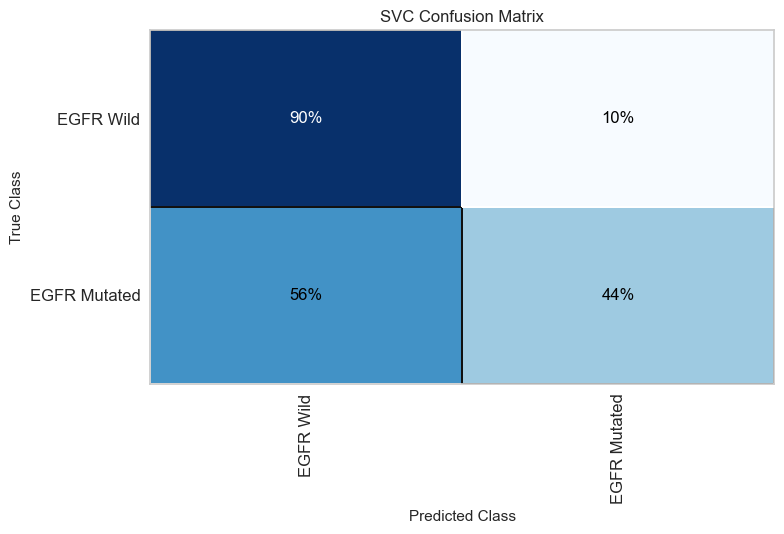

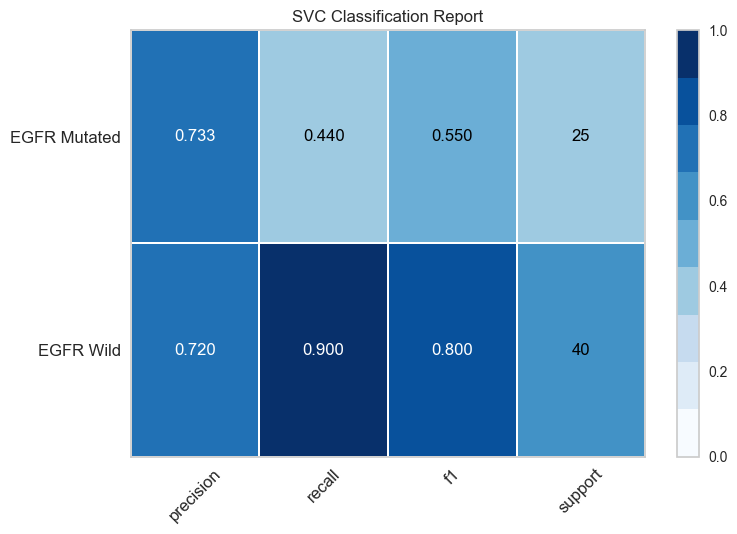

ModelError: no curves will be drawn; set binary=True.

In [53]:
# Visualization of Results --> Feature Importances
# svm_tuned1 = wrap(svm_tuned)
# plot_feature_importances(svm_tuned)
# report_results_quickly(svm_tuned)
plot_results(svm_tuned)
# plot_learning_curve(svm_tuned)

In [56]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.8

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-XGB73', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.85      0.82      0.84        40
EGFR Mutated       0.73      0.76      0.75        25

    accuracy                           0.80        65
   macro avg       0.79      0.79      0.79        65
weighted avg       0.80      0.80      0.80        65

precision 0.7307692307692307 accuracy 0.8 recall 0.76 auc 0.7925


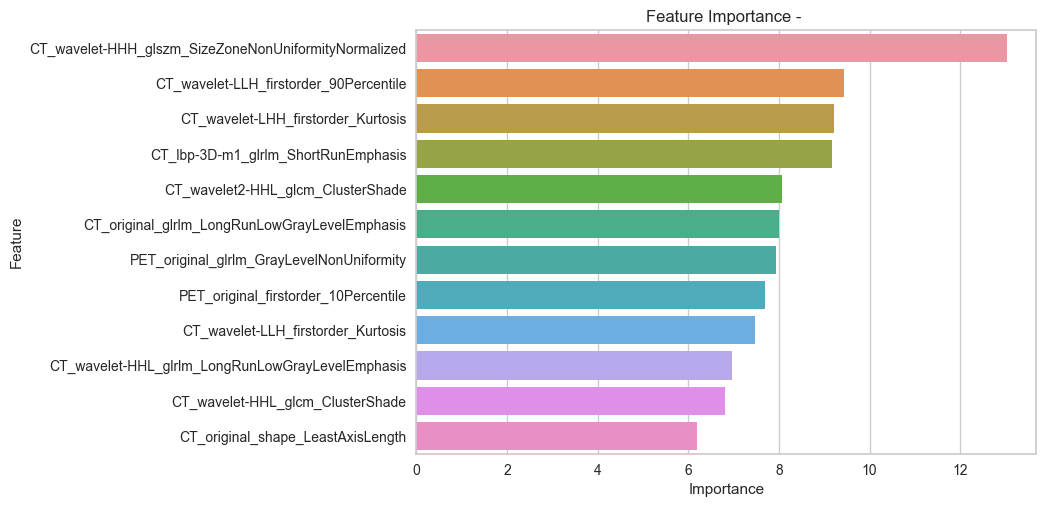

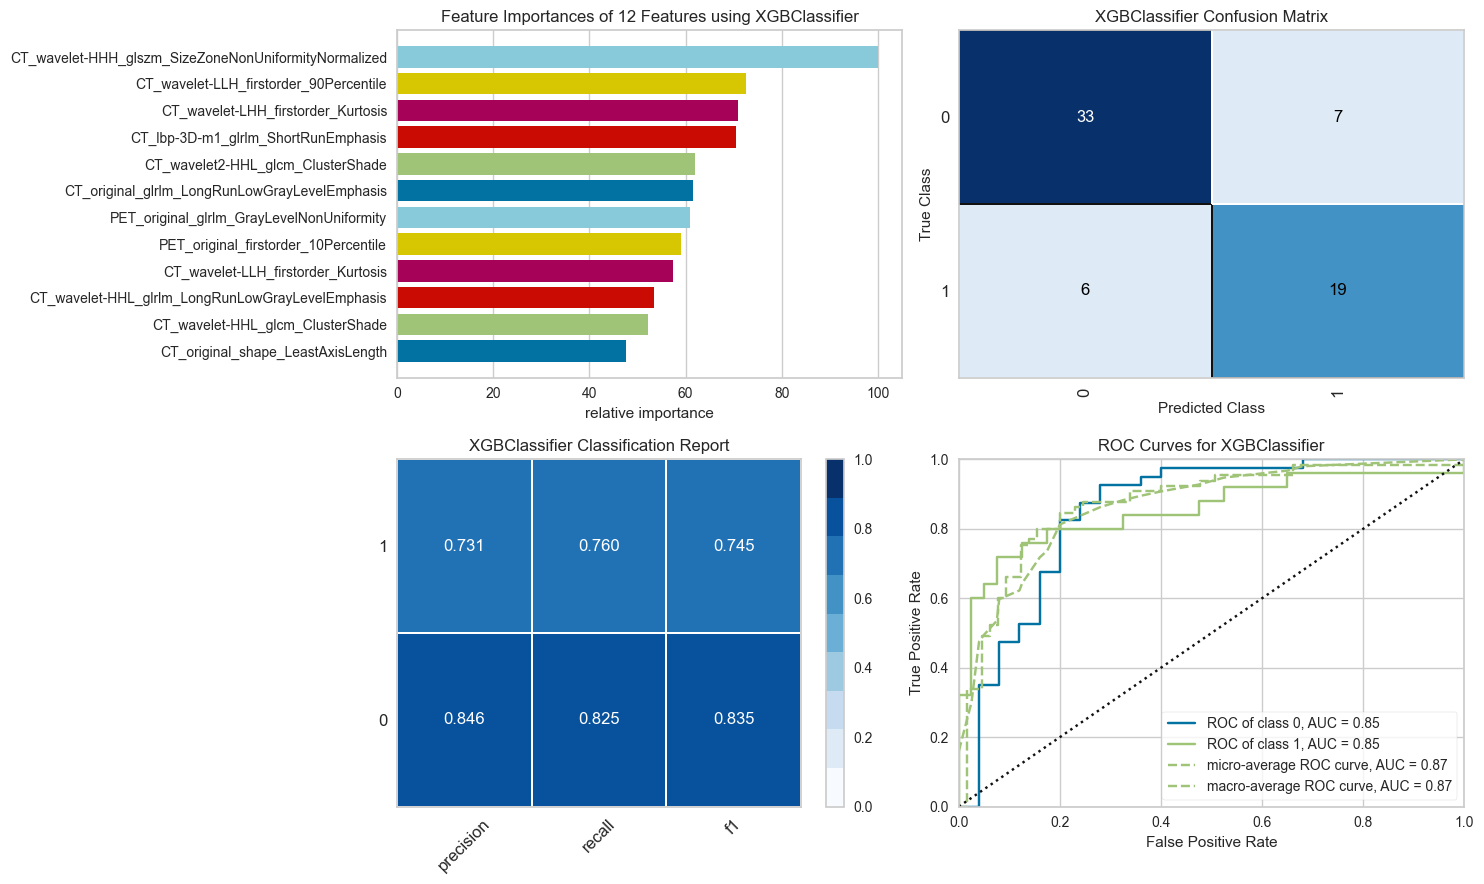

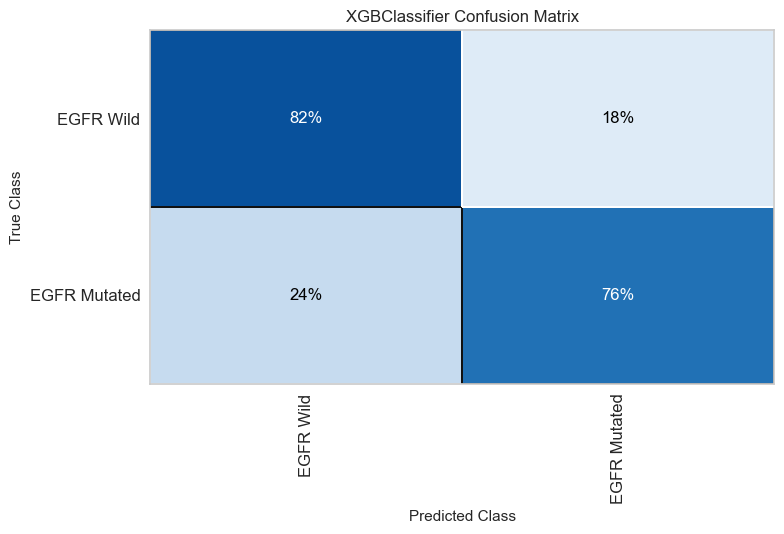

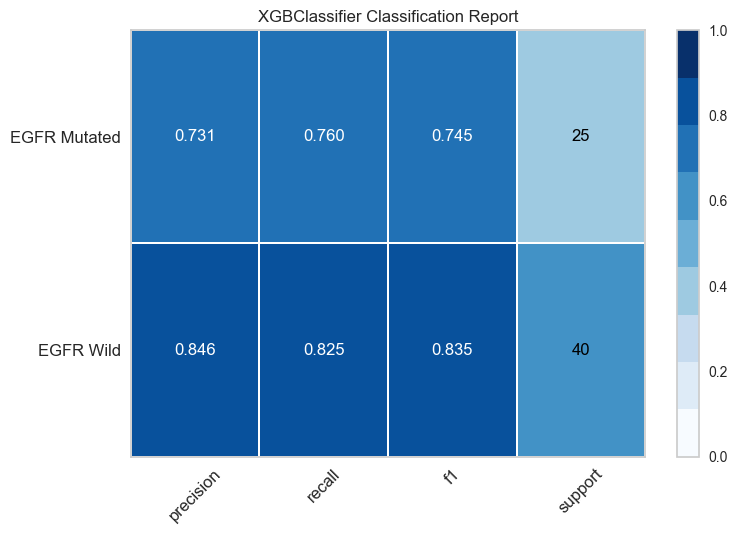

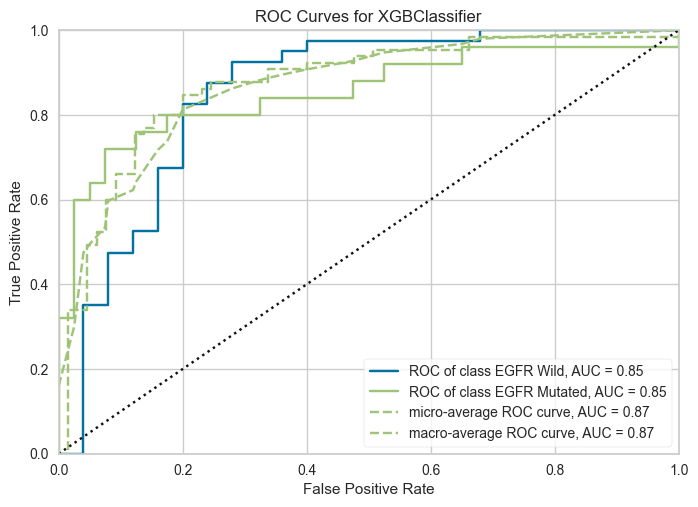

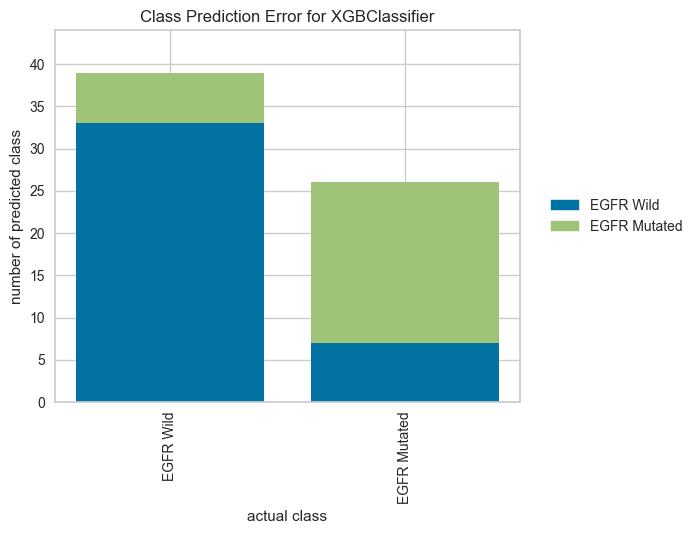

In [59]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [61]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.7538461538461538

In [62]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-lgb73', Save_format = 'csv',Save_type = 'col')

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-RF12-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.76      0.88      0.81        40
EGFR Mutated       0.74      0.56      0.64        25

    accuracy                           0.75        65
   macro avg       0.75      0.72      0.73        65
weighted avg       0.75      0.75      0.75        65

precision 0.7368421052631579 accuracy 0.7538461538461538 recall 0.56 auc 0.7175


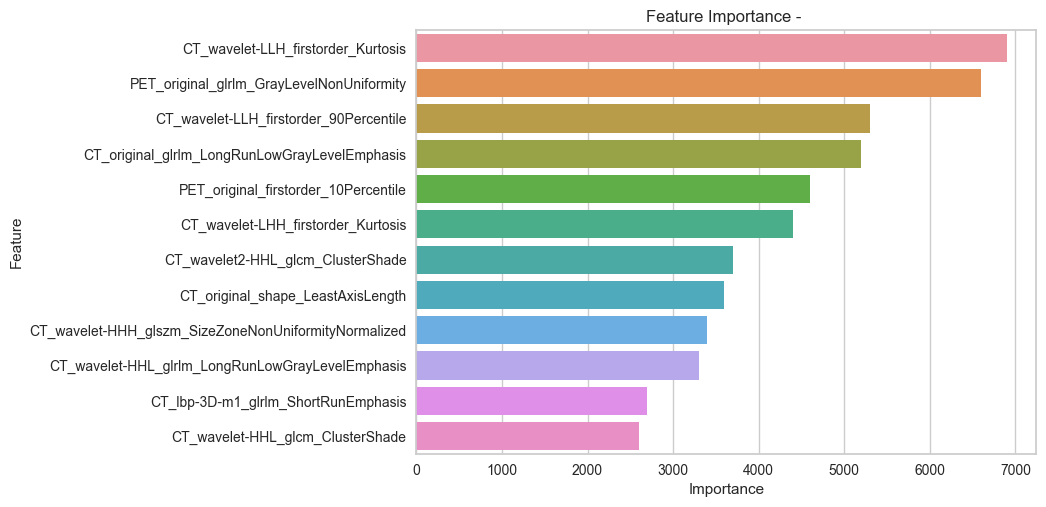

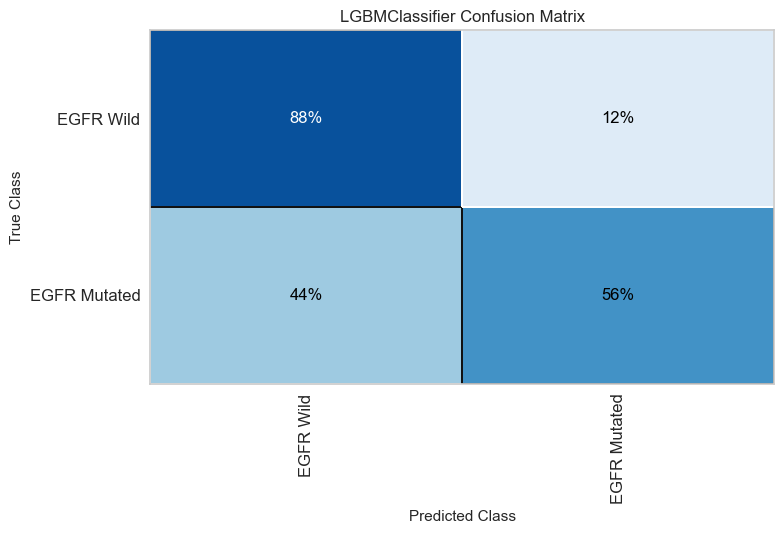

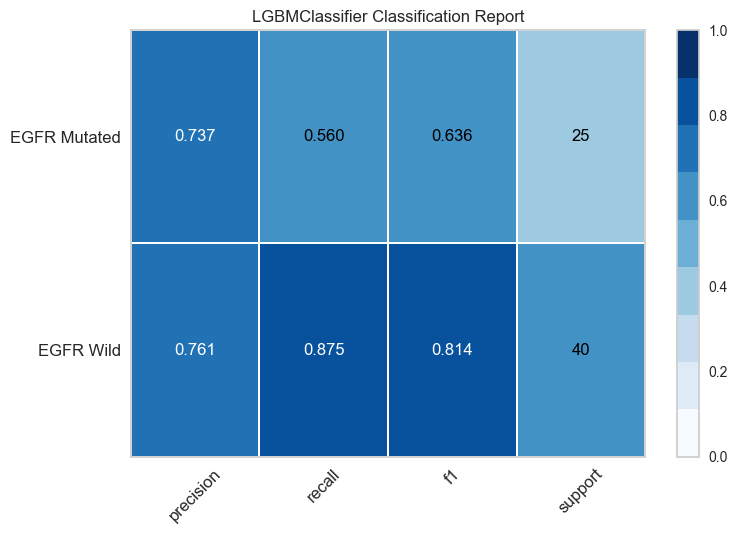

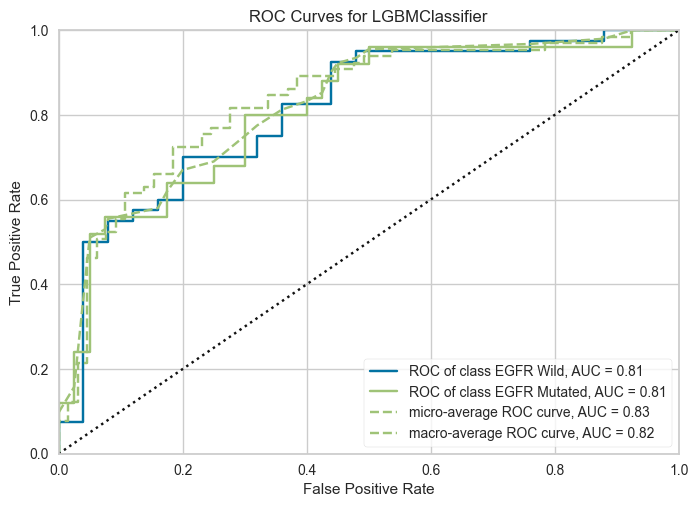

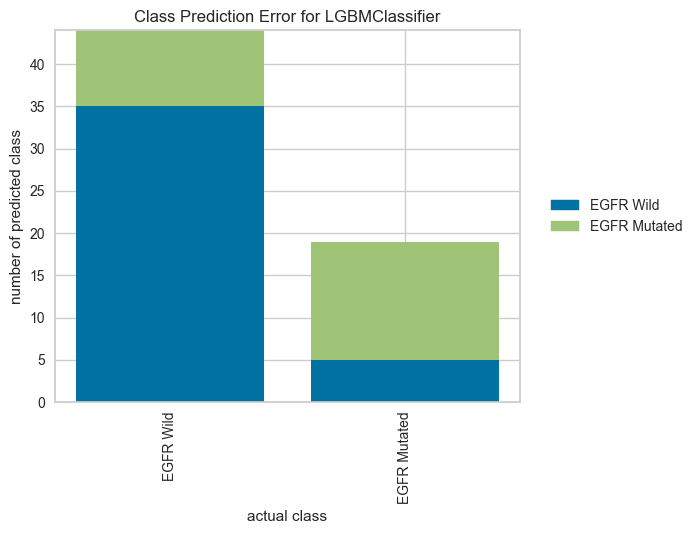

In [64]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6929897	total: 396us	remaining: 198ms
1:	learn: 0.6927105	total: 1.03ms	remaining: 256ms
2:	learn: 0.6924479	total: 1.45ms	remaining: 241ms
3:	learn: 0.6922222	total: 1.86ms	remaining: 231ms
4:	learn: 0.6919801	total: 2.29ms	remaining: 227ms
5:	learn: 0.6915555	total: 2.69ms	remaining: 222ms
6:	learn: 0.6911878	total: 3.07ms	remaining: 216ms
7:	learn: 0.6909746	total: 3.46ms	remaining: 213ms
8:	learn: 0.6905117	total: 3.89ms	remaining: 212ms
9:	learn: 0.6902072	total: 4.24ms	remaining: 208ms
10:	learn: 0.6900387	total: 4.55ms	remaining: 202ms
11:	learn: 0.6898867	total: 4.93ms	remaining: 200ms
12:	learn: 0.6894775	total: 5.21ms	remaining: 195ms
13:	learn: 0.6892236	total: 5.48ms	remaining: 190ms
14:	learn: 0.6890258	total: 5.74ms	remaining: 186ms
15:	learn: 0.6887600	total: 6.04ms	remaining: 183ms
16:	learn: 0.6884651	total: 6.36ms	remaining: 181ms
17:	learn: 0.6881568	total: 6.67ms	remaining: 1

488:	learn: 0.6154671	total: 142ms	remaining: 3.2ms
489:	learn: 0.6153379	total: 143ms	remaining: 2.91ms
490:	learn: 0.6151682	total: 143ms	remaining: 2.62ms
491:	learn: 0.6150908	total: 143ms	remaining: 2.33ms
492:	learn: 0.6149836	total: 143ms	remaining: 2.04ms
493:	learn: 0.6149179	total: 144ms	remaining: 1.75ms
494:	learn: 0.6148510	total: 144ms	remaining: 1.46ms
495:	learn: 0.6147326	total: 144ms	remaining: 1.16ms
496:	learn: 0.6146017	total: 145ms	remaining: 873us
497:	learn: 0.6145365	total: 145ms	remaining: 582us
498:	learn: 0.6144144	total: 145ms	remaining: 291us
499:	learn: 0.6143183	total: 146ms	remaining: 0us
CatBoost: 0.702500

################ Train and test results for the model: ################

     models  accuracy_train  accuracy_test
0  CatBoost           0.665          0.703


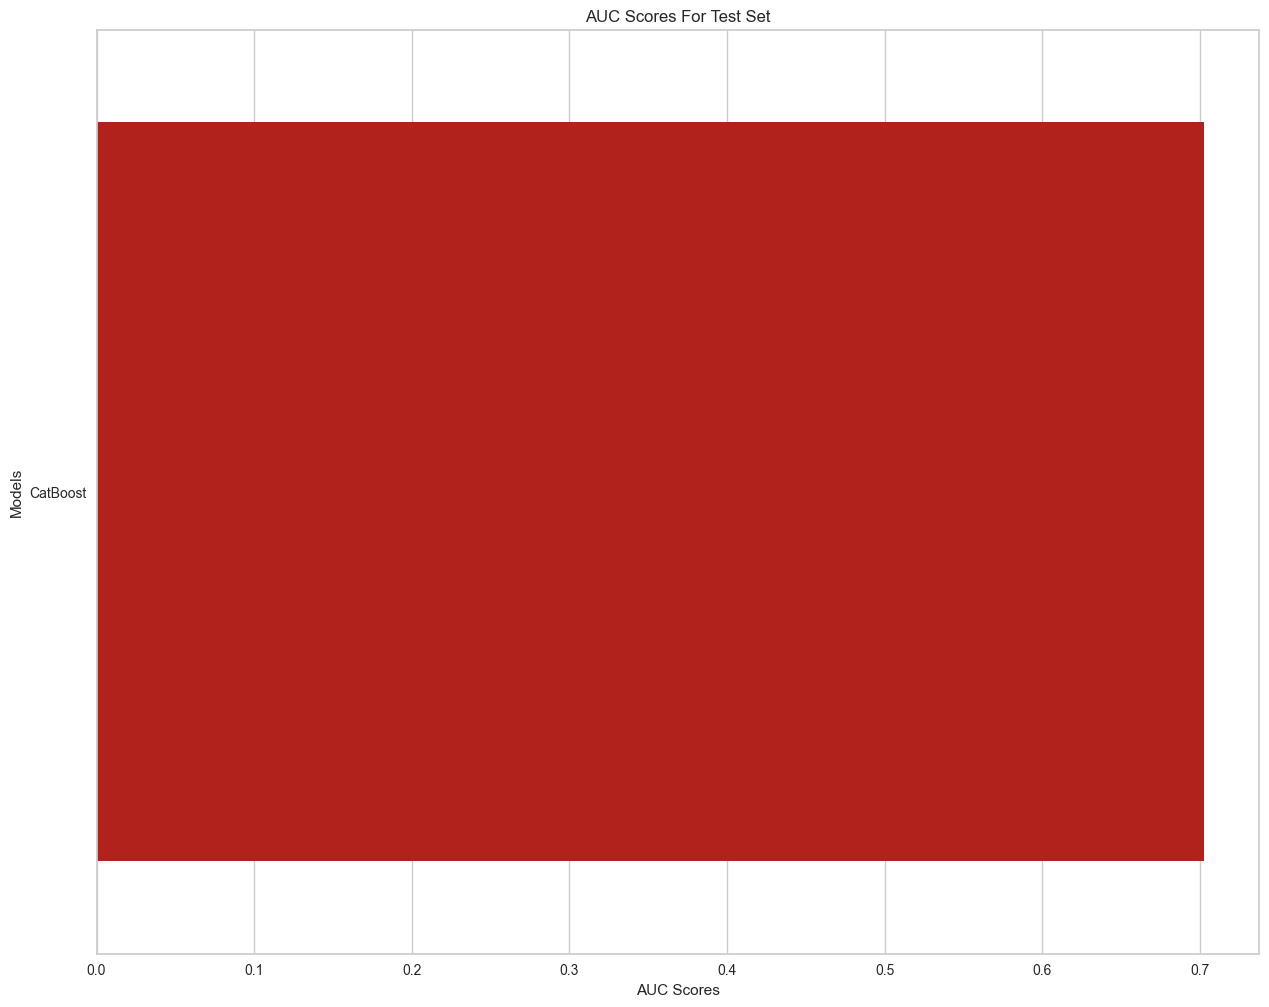

In [33]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
    ('LogisticRegression', logreg_tuned),
                ('RF', rf_tuned),
                ('XGBoost', xgb_tuned),
                ('LightGBM', lgbm_tuned),
#                ('CatBoost', cb_tuned)
                ('SVM', svm_tuned),
                ('GBDT', gbdt_tuned),
# #                 ('NGBoost', ngb_tuned),
#                 ('DT', dt_tuned),
                ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

0:	learn: 0.6917498	total: 470us	remaining: 141ms
1:	learn: 0.6900831	total: 1.08ms	remaining: 161ms
2:	learn: 0.6885877	total: 1.5ms	remaining: 148ms
3:	learn: 0.6879157	total: 1.96ms	remaining: 145ms
4:	learn: 0.6848116	total: 2.37ms	remaining: 140ms
5:	learn: 0.6829854	total: 2.77ms	remaining: 136ms
6:	learn: 0.6809424	total: 3.16ms	remaining: 132ms
7:	learn: 0.6798609	total: 3.57ms	remaining: 130ms
8:	learn: 0.6781737	total: 4.01ms	remaining: 130ms
9:	learn: 0.6760009	total: 4.41ms	remaining: 128ms
10:	learn: 0.6726714	total: 4.8ms	remaining: 126ms
11:	learn: 0.6711352	total: 5.19ms	remaining: 125ms
12:	learn: 0.6698689	total: 5.58ms	remaining: 123ms
13:	learn: 0.6671995	total: 5.99ms	remaining: 122ms
14:	learn: 0.6644679	total: 6.37ms	remaining: 121ms
15:	learn: 0.6628211	total: 6.77ms	remaining: 120ms
16:	learn: 0.6615068	total: 7.15ms	remaining: 119ms
17:	learn: 0.6599944	total: 7.54ms	remaining: 118ms
18:	learn: 0.6579410	total: 7.91ms	remaining: 117ms
19:	learn: 0.6557141	tota

13:	learn: 0.6695154	total: 6.21ms	remaining: 127ms
14:	learn: 0.6670991	total: 6.63ms	remaining: 126ms
15:	learn: 0.6643844	total: 7ms	remaining: 124ms
16:	learn: 0.6619357	total: 7.36ms	remaining: 123ms
17:	learn: 0.6607096	total: 7.75ms	remaining: 121ms
18:	learn: 0.6589628	total: 8.25ms	remaining: 122ms
19:	learn: 0.6578121	total: 8.64ms	remaining: 121ms
20:	learn: 0.6547606	total: 9.02ms	remaining: 120ms
21:	learn: 0.6530513	total: 9.4ms	remaining: 119ms
22:	learn: 0.6517902	total: 9.76ms	remaining: 118ms
23:	learn: 0.6502482	total: 10.1ms	remaining: 116ms
24:	learn: 0.6486889	total: 10.5ms	remaining: 116ms
25:	learn: 0.6474296	total: 10.9ms	remaining: 115ms
26:	learn: 0.6463272	total: 11.2ms	remaining: 114ms
27:	learn: 0.6443414	total: 11.6ms	remaining: 113ms
28:	learn: 0.6426757	total: 12ms	remaining: 112ms
29:	learn: 0.6415790	total: 12.3ms	remaining: 111ms
30:	learn: 0.6392922	total: 12.7ms	remaining: 110ms
31:	learn: 0.6382697	total: 13.1ms	remaining: 109ms
32:	learn: 0.63631

[iter 0] loss=0.6802 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.1057 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 0] loss=0.6789 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0810 val_loss=0.0000 scale=0.0001 norm=0.0001
0:	learn: 0.6916459	total: 657us	remaining: 197ms
1:	learn: 0.6898891	total: 1.32ms	remaining: 197ms
2:	learn: 0.6883288	total: 1.8ms	remaining: 178ms
3:	learn: 0.6871953	total: 2.31ms	remaining: 171ms
4:	learn: 0.6860901	total: 2.77ms	remaining: 164ms
5:	learn: 0.6842929	total: 3.25ms	remaining: 159ms
6:	learn: 0.6831792	total: 3.75ms	remaining: 157ms
7:	learn: 0.6822600	total: 4.21ms	remaining: 154ms
8:	learn: 0.6814747	total: 4.69ms	remaining: 152ms
9:	learn: 0.6801856	total: 5.17ms	remaining: 150ms
10:	learn: 0.6793897	total: 5.63ms	remaining: 148ms
11:	learn: 0.6781396	total: 6.11ms	remaining: 147ms
12:	learn: 0.6767388	total: 6.54ms	remaining: 144ms
13:	learn: 0.6756725	total: 7ms	remaining: 143ms
14:	learn: 0.6741281	total: 7.45ms	

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1455 val_loss=0.0000 scale=0.0002 norm=0.0003
################ Accuracy scores for test set for the models: ################

0:	learn: 0.6920659	total: 485us	remaining: 145ms
1:	learn: 0.6904435	total: 1.11ms	remaining: 166ms
2:	learn: 0.6887526	total: 1.54ms	remaining: 153ms
3:	learn: 0.6874709	total: 1.94ms	remaining: 144ms
4:	learn: 0.6850232	total: 2.35ms	remaining: 139ms
5:	learn: 0.6839022	total: 2.75ms	remaining: 135ms
6:	learn: 0.6824831	total: 3.16ms	remaining: 132ms
7:	learn: 0.6808310	total: 3.61ms	remaining: 132ms
8:	learn: 0.6800235	total: 4.01ms	remaining: 130ms
9:	learn: 0.6792664	total: 4.43ms	remaining: 129ms
10:	learn: 0.6773281	total: 4.85ms	remaining: 128ms
11:	learn: 0.6761329	total: 5.46ms	remaining: 131ms
12:	learn: 0.6750144	total: 5.96ms	remaining: 132ms
13:	learn: 0.6738168	total: 6.4ms	remaining: 131ms
14:	learn: 0.6723936	total: 6.84ms	remaining: 130ms
15:	learn: 0.6713073	total

1:	learn: 0.6888496	total: 15.4ms	remaining: 2.29s
2:	learn: 0.6858732	total: 15.9ms	remaining: 1.57s
3:	learn: 0.6844951	total: 16.3ms	remaining: 1.2s
4:	learn: 0.6828101	total: 16.7ms	remaining: 986ms
5:	learn: 0.6802923	total: 17.1ms	remaining: 840ms
6:	learn: 0.6784509	total: 17.5ms	remaining: 734ms
7:	learn: 0.6764884	total: 17.9ms	remaining: 655ms
8:	learn: 0.6738774	total: 18.4ms	remaining: 594ms
9:	learn: 0.6718641	total: 18.7ms	remaining: 544ms
10:	learn: 0.6704441	total: 19.1ms	remaining: 503ms
11:	learn: 0.6687845	total: 19.5ms	remaining: 469ms
12:	learn: 0.6669307	total: 19.9ms	remaining: 440ms
13:	learn: 0.6651716	total: 20.3ms	remaining: 415ms
14:	learn: 0.6631109	total: 20.7ms	remaining: 393ms
15:	learn: 0.6612893	total: 21.1ms	remaining: 374ms
16:	learn: 0.6591503	total: 21.5ms	remaining: 358ms
17:	learn: 0.6574687	total: 21.9ms	remaining: 343ms
18:	learn: 0.6558803	total: 22.3ms	remaining: 330ms
19:	learn: 0.6533578	total: 22.7ms	remaining: 318ms
20:	learn: 0.6518769	t

[iter 0] loss=0.6802 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0112 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 0] loss=0.6789 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1004 val_loss=0.0000 scale=0.0001 norm=0.0001
0:	learn: 0.6916459	total: 23.8ms	remaining: 7.1s
1:	learn: 0.6898891	total: 24.7ms	remaining: 3.67s
2:	learn: 0.6883288	total: 26.6ms	remaining: 2.64s
3:	learn: 0.6871953	total: 27.3ms	remaining: 2.02s
4:	learn: 0.6860901	total: 27.8ms	remaining: 1.64s
5:	learn: 0.6842929	total: 28.2ms	remaining: 1.38s
6:	learn: 0.6831792	total: 28.7ms	remaining: 1.2s
7:	learn: 0.6822600	total: 29.2ms	remaining: 1.07s
8:	learn: 0.6814747	total: 29.7ms	remaining: 961ms
9:	learn: 0.6801856	total: 30.2ms	remaining: 877ms
10:	learn: 0.6793897	total: 30.8ms	remaining: 810ms
11:	learn: 0.6781396	total: 31.4ms	remaining: 752ms
12:	learn: 0.6767388	total: 31.8ms	remaining: 703ms
13:	learn: 0.6756725	total: 32.4ms	remaining: 663ms
14:	learn: 0.6741281	total: 33ms

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1455 val_loss=0.0000 scale=0.0002 norm=0.0003
stack model: 0.598679

################ Train and test results for the model: ################

        models  accuracy_train  accuracy_test
0  stack model           0.779          0.599


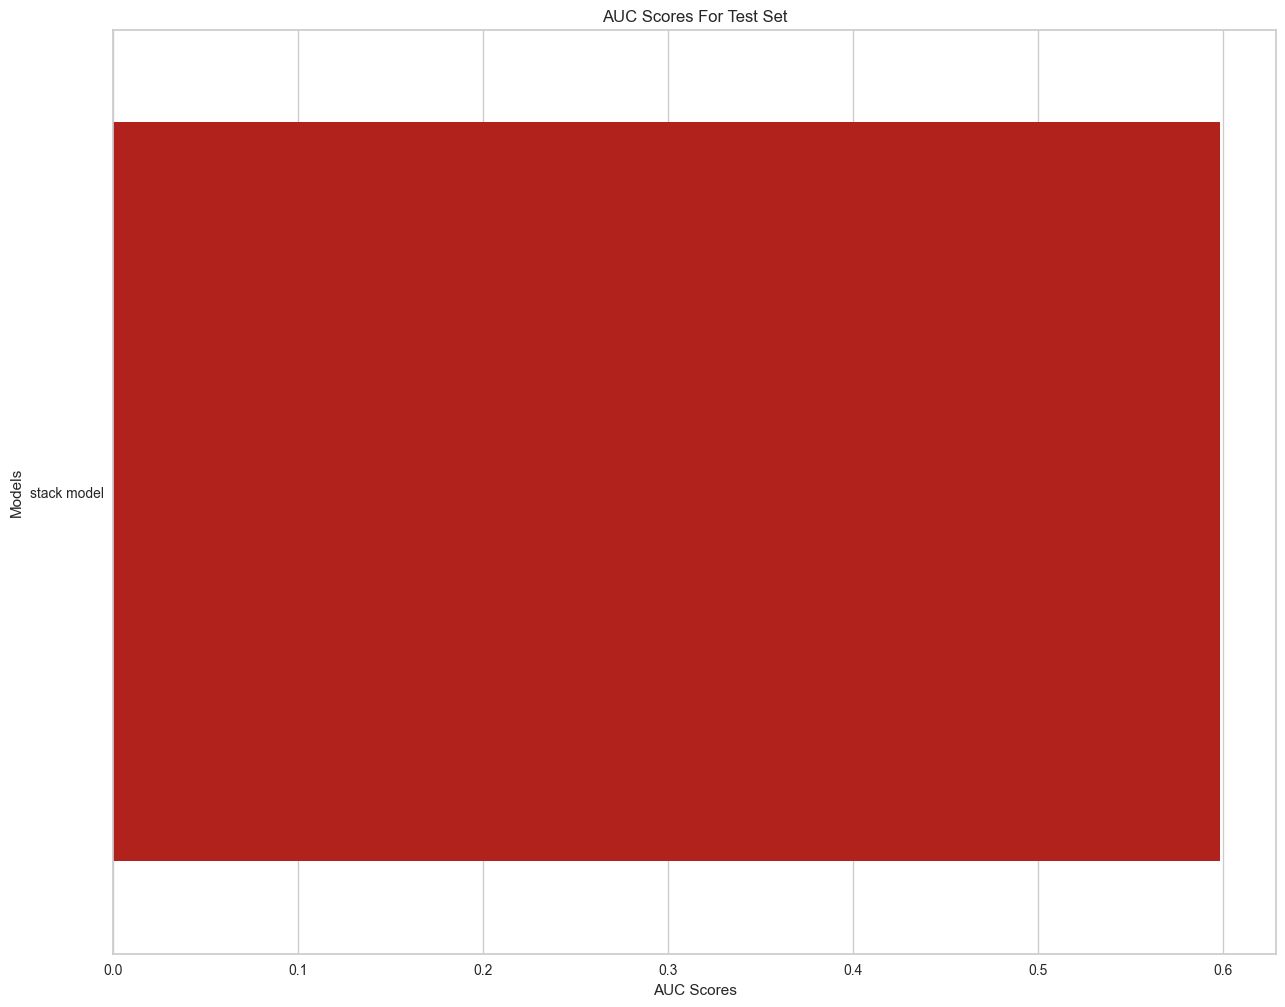

In [94]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


In [95]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [96]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

0.61615515771526

In [97]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-RF12-stack73', Save_format = 'csv',Save_type = 'col')

In [34]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3/RFE-RF-GB/RF121")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group3/new-auc/testZscore-RF12.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [37]:
OSPath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3"

In [38]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.56      0.81      0.66        31
EGFR Mutated       0.60      0.31      0.41        29

    accuracy                           0.57        60
   macro avg       0.58      0.56      0.53        60
weighted avg       0.58      0.57      0.54        60

precision 0.6 accuracy 0.5666666666666667 recall 0.3103448275862069 auc 0.5583982202447163


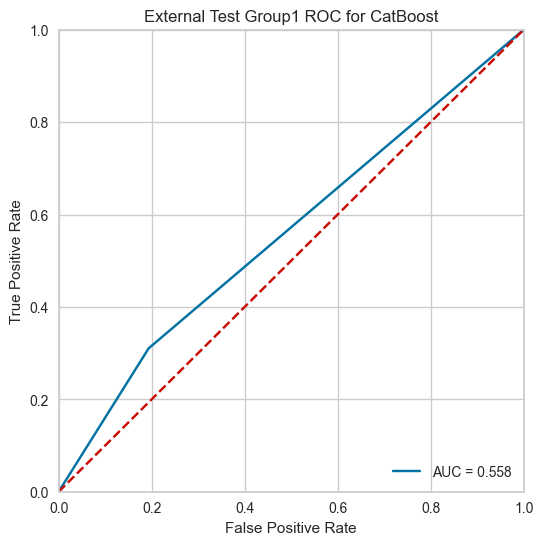

In [39]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[25  6]
 [20  9]]
Normalized confusion matrix
[[0.81 0.19]
 [0.69 0.31]]


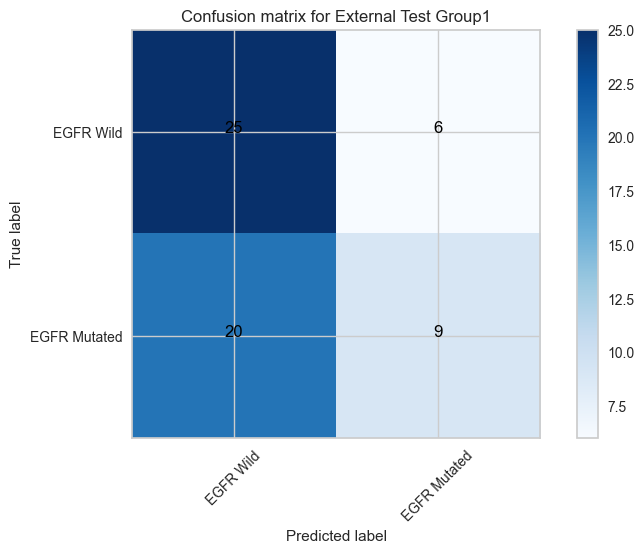

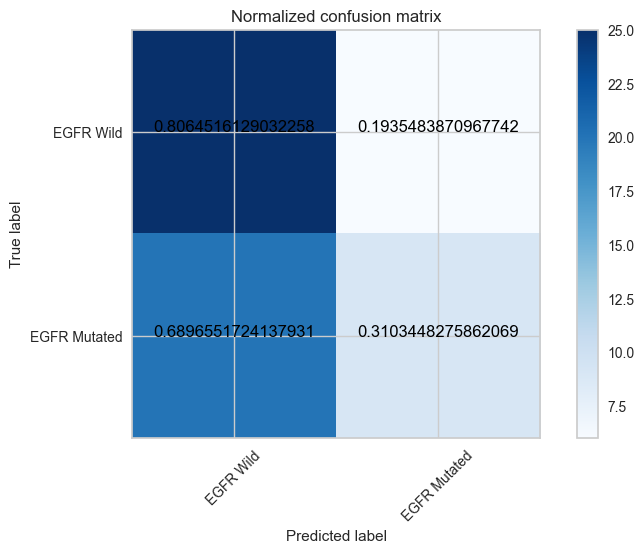

In [41]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [42]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.49      0.65      0.56        31
EGFR Mutated       0.42      0.28      0.33        29

    accuracy                           0.47        60
   macro avg       0.45      0.46      0.44        60
weighted avg       0.46      0.47      0.45        60

precision 0.42105263157894735 accuracy 0.4666666666666667 recall 0.27586206896551724 auc 0.46051167964404893


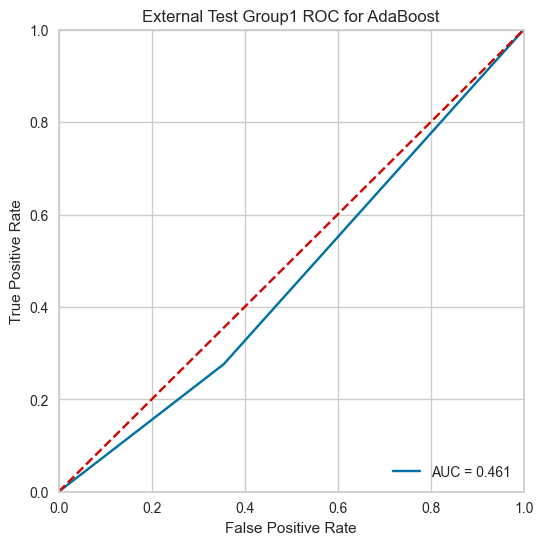

In [43]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [44]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[20 11]
 [21  8]]
Normalized confusion matrix
[[0.65 0.35]
 [0.72 0.28]]


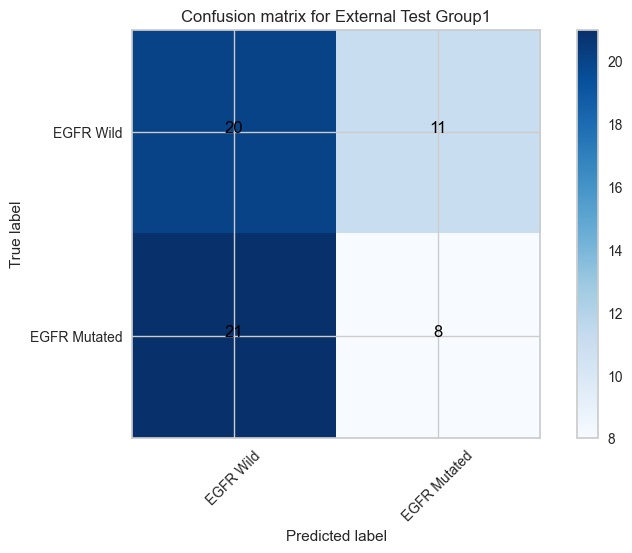

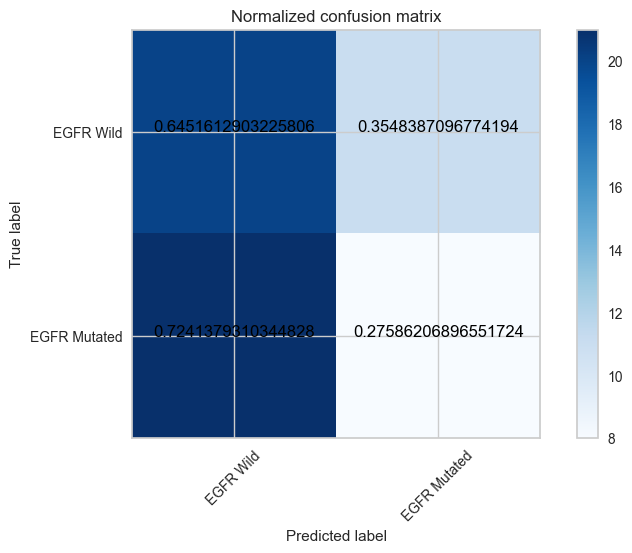

In [45]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.56      0.58      0.57        31
EGFR Mutated       0.54      0.52      0.53        29

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.55      0.55      0.55        60

precision 0.5491071428571428 accuracy 0.55 recall 0.5489432703003337 auc 0.5489432703003336


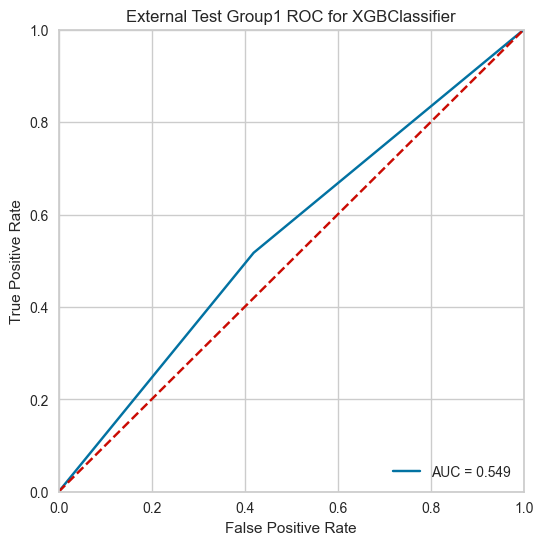

In [47]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [48]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18 13]
 [14 15]]
Normalized confusion matrix
[[0.58 0.42]
 [0.48 0.52]]


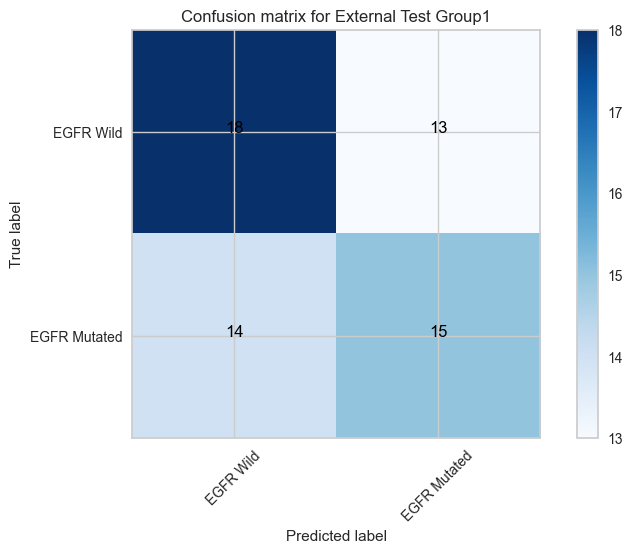

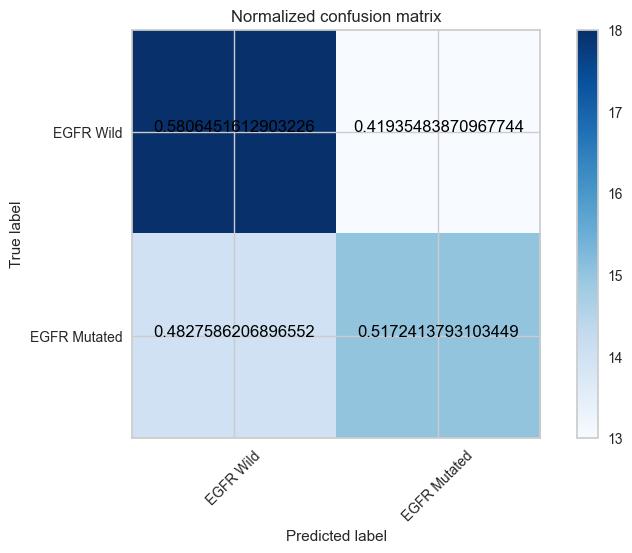

In [49]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [50]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.55      0.74      0.63        31
EGFR Mutated       0.56      0.34      0.43        29

    accuracy                           0.55        60
   macro avg       0.55      0.54      0.53        60
weighted avg       0.55      0.55      0.53        60

precision 0.5555555555555556 accuracy 0.55 recall 0.3448275862068966 auc 0.5433815350389322


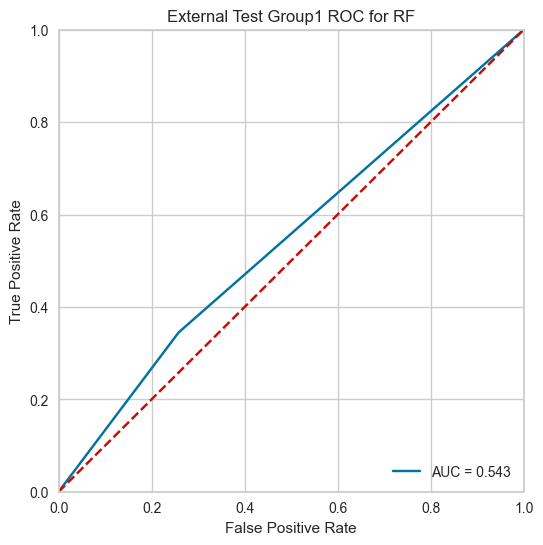

In [51]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[23  8]
 [19 10]]
Normalized confusion matrix
[[0.74 0.26]
 [0.66 0.34]]


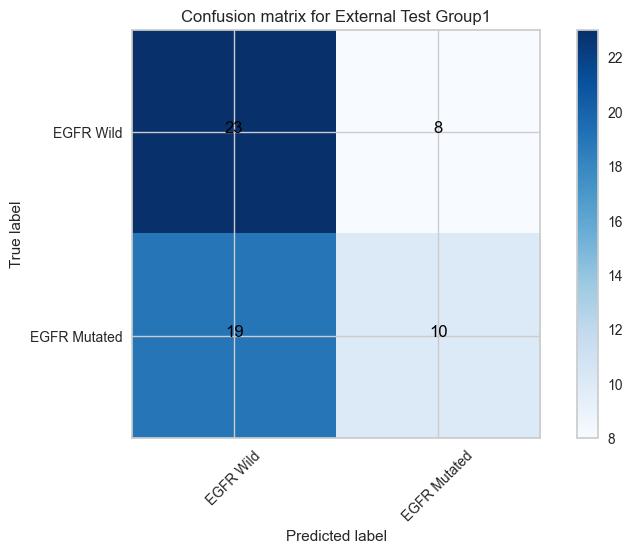

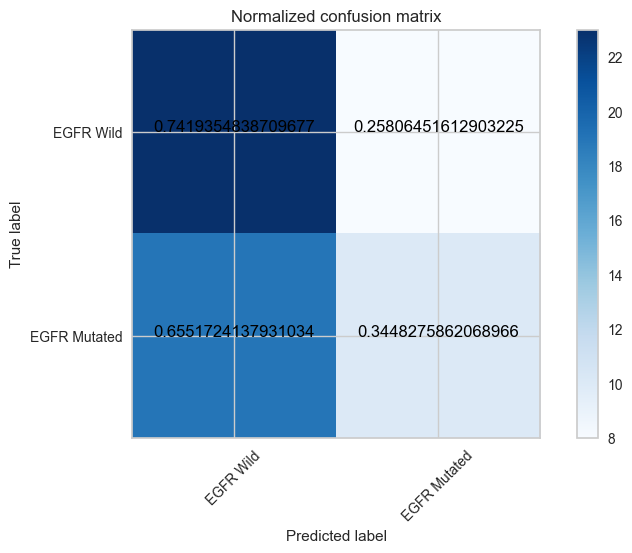

In [52]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [53]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.51      0.90      0.65        31
EGFR Mutated       0.40      0.07      0.12        29

    accuracy                           0.50        60
   macro avg       0.45      0.49      0.38        60
weighted avg       0.46      0.50      0.39        60

precision 0.4 accuracy 0.5 recall 0.06896551724137931 auc 0.48609566184649605


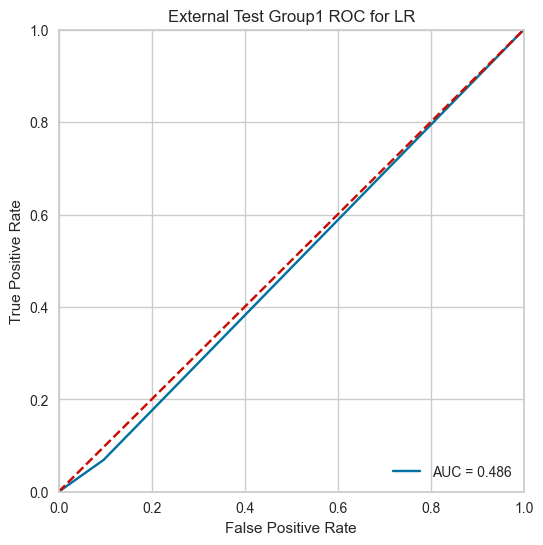

In [54]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[28  3]
 [27  2]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.93 0.07]]


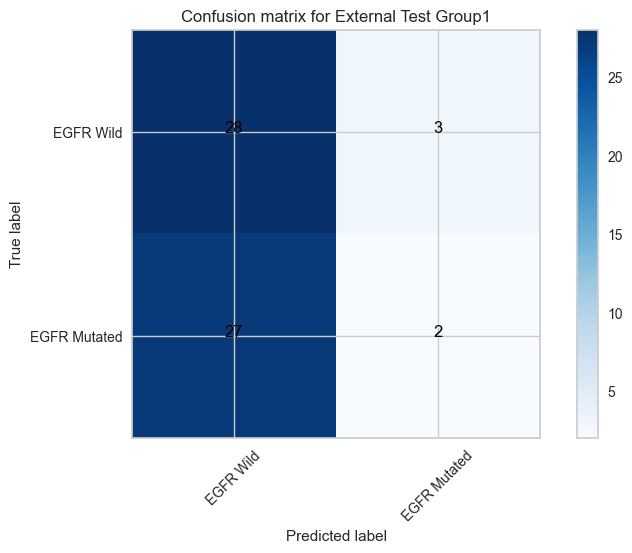

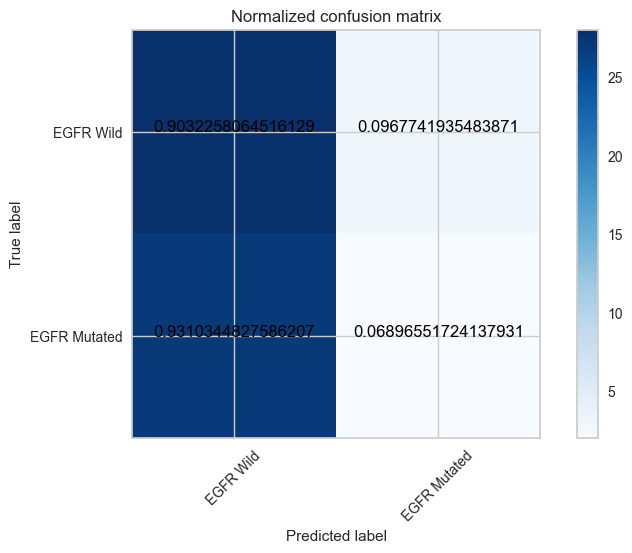

In [55]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
##DT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/DT.pkl'
finalpkl =  OSPath + pathpkl
dt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=dt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-DT-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      1.00      0.68        31
EGFR Mutated       0.00      0.00      0.00        29

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60

precision 0.0 accuracy 0.5166666666666667 recall 0.0 auc 0.5


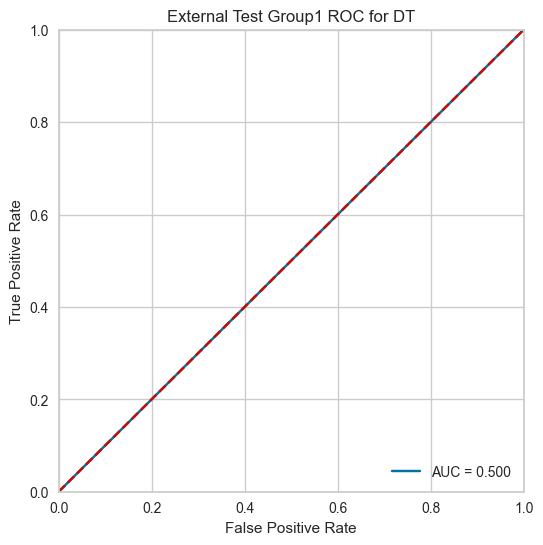

In [57]:
######dt 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[31  0]
 [29  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


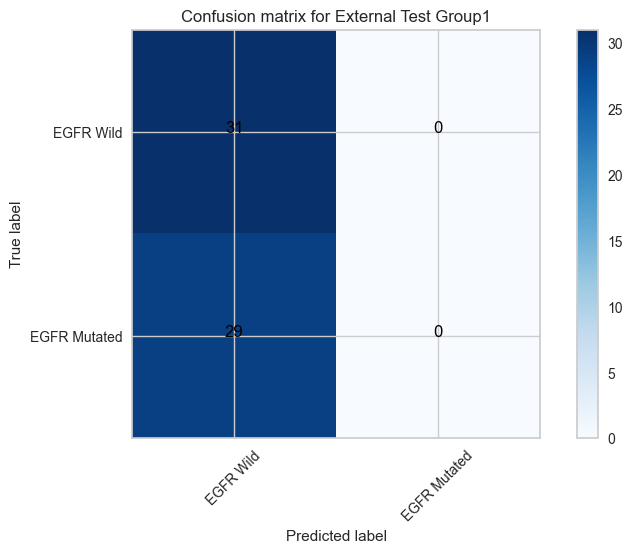

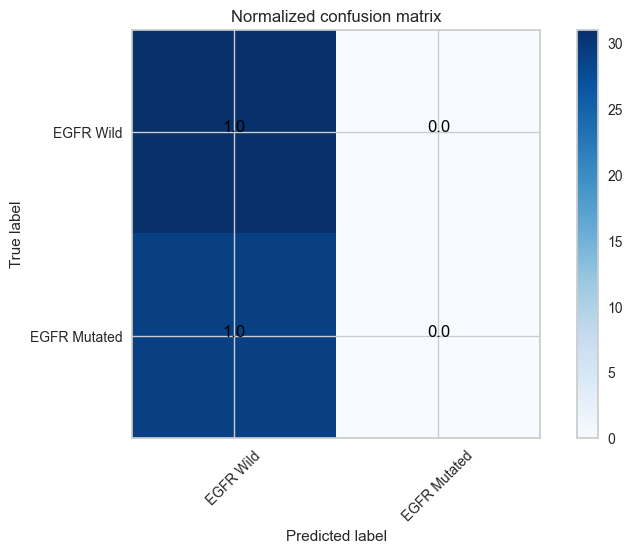

In [58]:
##dt 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [59]:
##NGB 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/NGBoost.pkl'
finalpkl =  OSPath + pathpkl
ngb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=ngb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-ngb-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/375-01-g3/RFE-RF-GB/RF121/NGBoost.pkl'

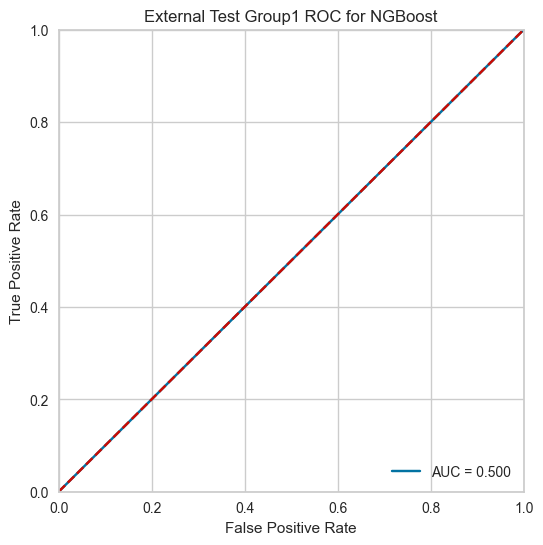

In [60]:
##NGB 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for NGBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[31  0]
 [29  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


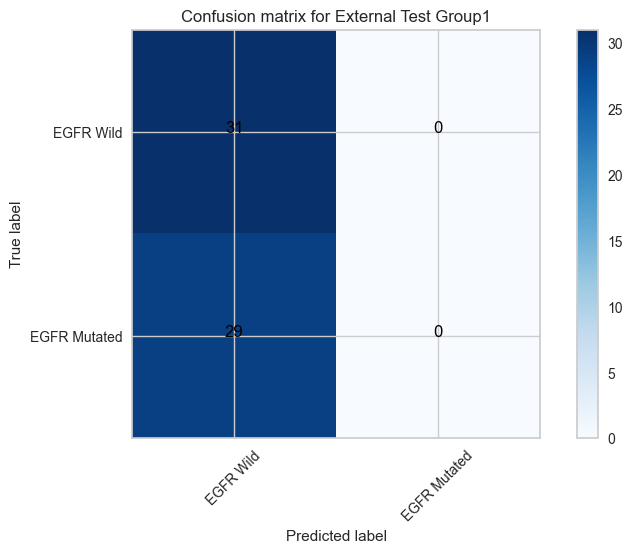

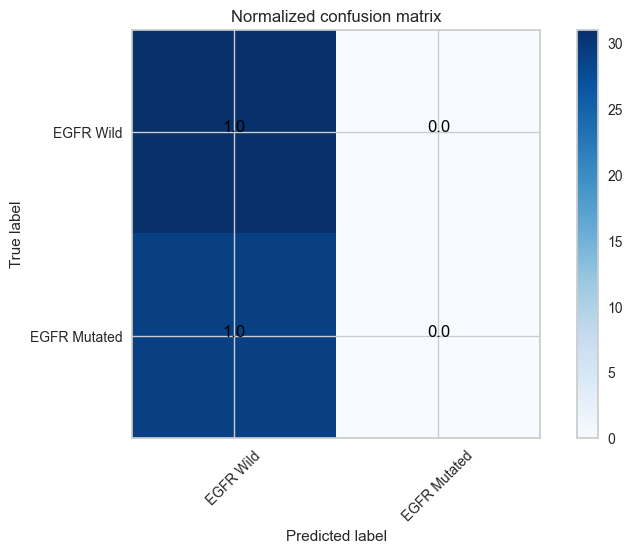

In [61]:
##NGB 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.53      0.74      0.62        31
EGFR Mutated       0.53      0.31      0.39        29

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.51        60
weighted avg       0.53      0.53      0.51        60

precision 0.5294117647058824 accuracy 0.5333333333333333 recall 0.3103448275862069 auc 0.5261401557285873


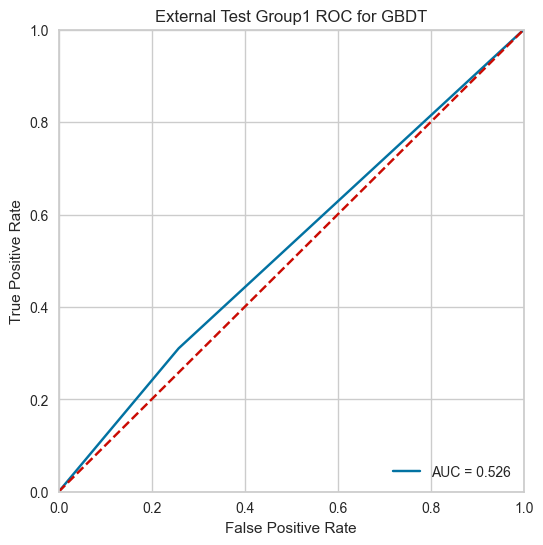

In [63]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[23  8]
 [20  9]]
Normalized confusion matrix
[[0.74 0.26]
 [0.69 0.31]]


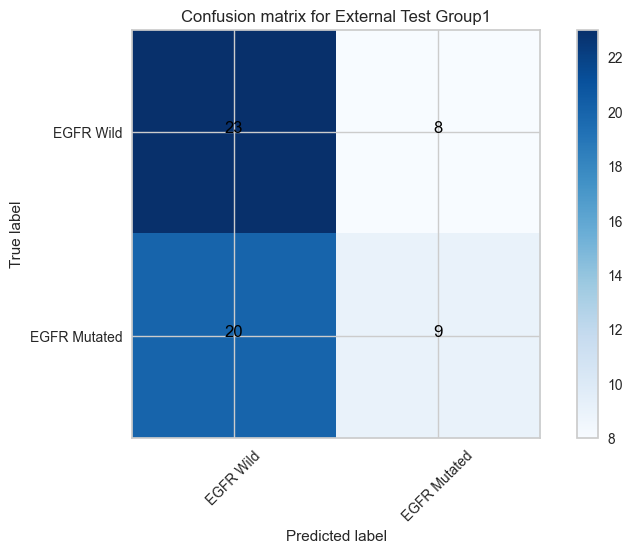

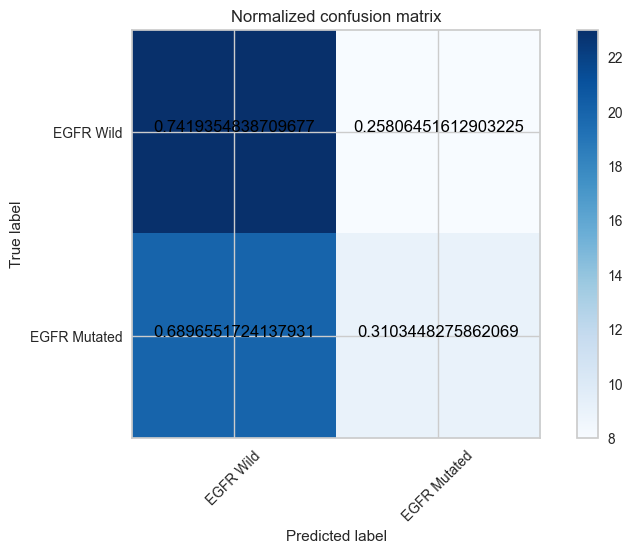

In [64]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [65]:
##svm 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/SVM.pkl'
finalpkl =  OSPath + pathpkl
svmt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=svmt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-SVM-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.54      0.81      0.65        31
EGFR Mutated       0.57      0.28      0.37        29

    accuracy                           0.55        60
   macro avg       0.56      0.54      0.51        60
weighted avg       0.56      0.55      0.52        60

precision 0.5714285714285714 accuracy 0.55 recall 0.27586206896551724 auc 0.5261401557285873


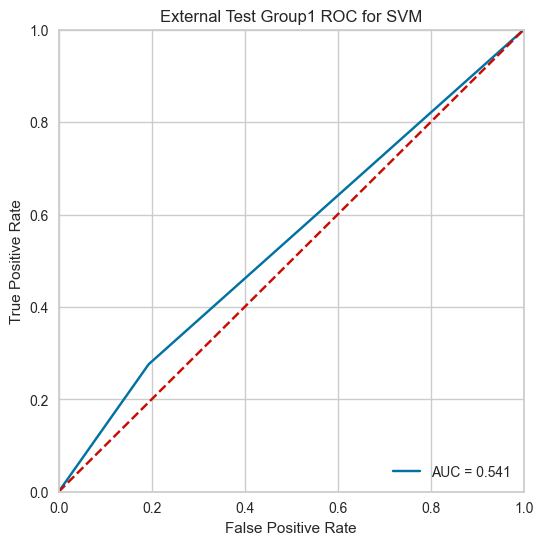

In [66]:
##svm 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[25  6]
 [21  8]]
Normalized confusion matrix
[[0.81 0.19]
 [0.72 0.28]]


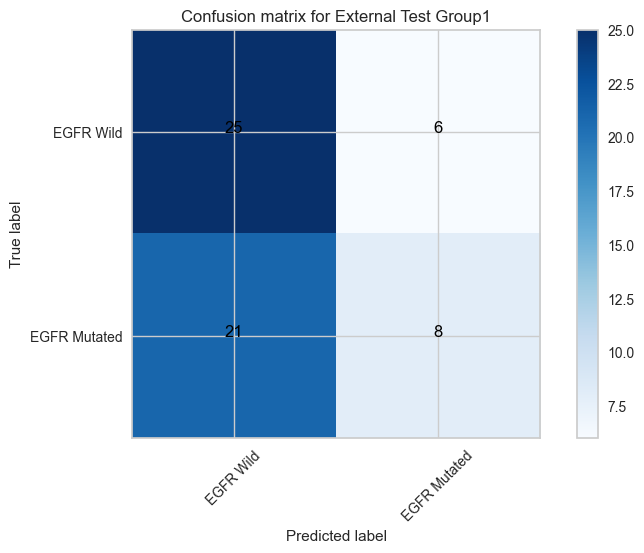

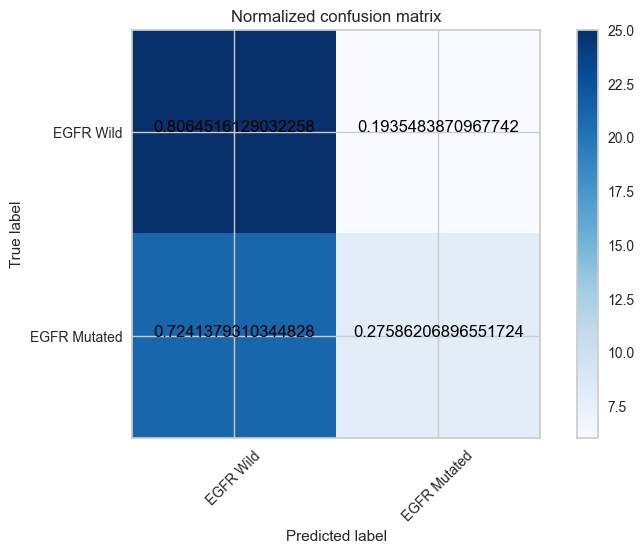

In [67]:
##svm 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [68]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/RF121/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-RF121-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.50      0.71      0.59        31
EGFR Mutated       0.44      0.24      0.31        29

    accuracy                           0.48        60
   macro avg       0.47      0.48      0.45        60
weighted avg       0.47      0.48      0.45        60

precision 0.4375 accuracy 0.48333333333333334 recall 0.2413793103448276 auc 0.4755283648498332


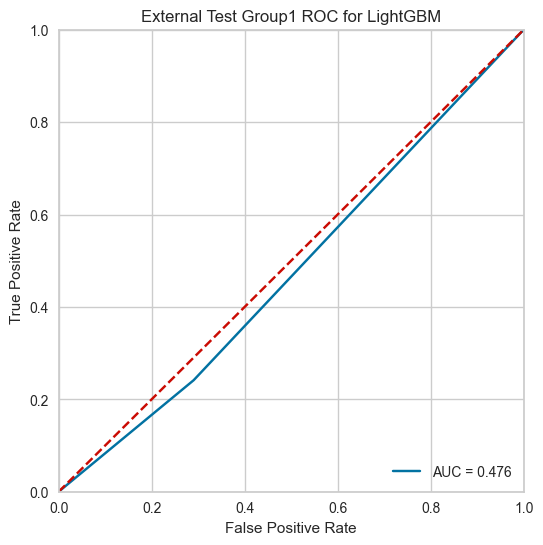

In [69]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[22  9]
 [22  7]]
Normalized confusion matrix
[[0.71 0.29]
 [0.76 0.24]]


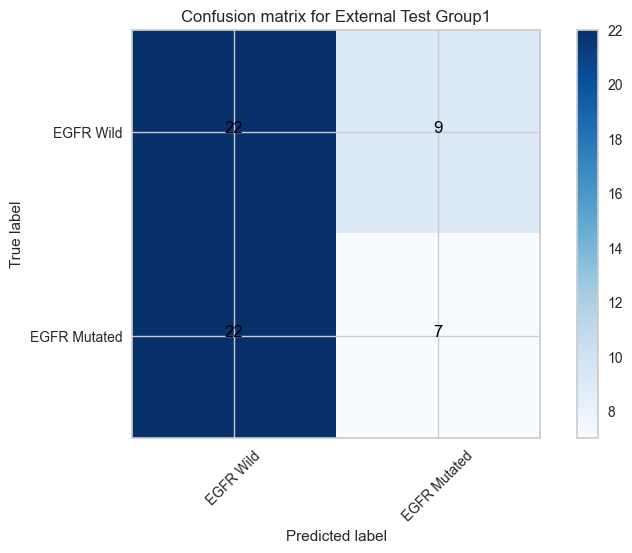

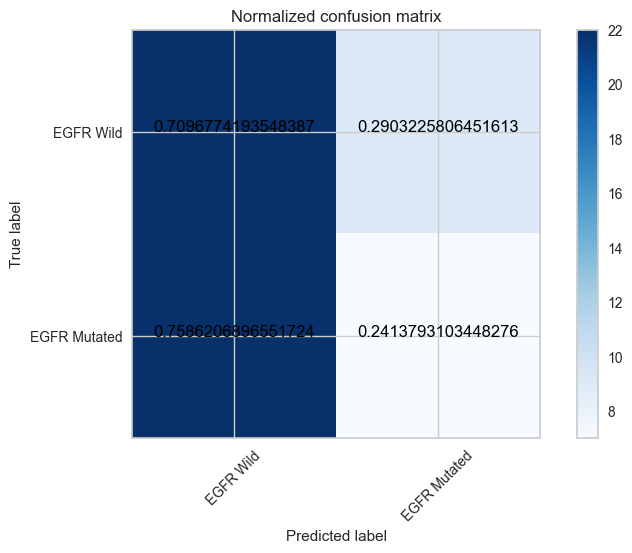

In [70]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()